### Data Description ###

In [1]:
import pandas as pd
import regex as re
import numpy as np
from scipy import stats
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
df = pd.read_csv('Data/data.csv', encoding='latin1')
abusive = pd.read_csv('Data/abusive.csv', encoding='utf-8')
new_kamusalay = pd.read_csv('Data/new_kamusalay.csv', encoding='latin1')

In [3]:
abusive_words_list = abusive['ABUSIVE'].tolist()

In [4]:
new_kamus_alay = {}
for k,v in new_kamusalay.values:
    new_kamus_alay[k] = v
new_kamus_alay

{'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokditolakwarga': 'ahok ditolak warga',
 'ahokdjarot': 'ahok dj

In [5]:
data_shape = df.shape
data_shape

(13169, 13)

In [6]:
column_names = df.columns.tolist()
column_names

['Tweet',
 'HS',
 'Abusive',
 'HS_Individual',
 'HS_Group',
 'HS_Religion',
 'HS_Race',
 'HS_Physical',
 'HS_Gender',
 'HS_Other',
 'HS_Weak',
 'HS_Moderate',
 'HS_Strong']

In [7]:
data_types = df.dtypes
data_types

Tweet            object
HS                int64
Abusive           int64
HS_Individual     int64
HS_Group          int64
HS_Religion       int64
HS_Race           int64
HS_Physical       int64
HS_Gender         int64
HS_Other          int64
HS_Weak           int64
HS_Moderate       int64
HS_Strong         int64
dtype: object

In [8]:
missing_values = df.isnull().sum()
missing_values

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [9]:
duplicate_row = df.duplicated().sum()
duplicate_row

125

In [10]:
data_summary = df.describe()
data_summary

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
sample_data = df.head()
sample_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


### Data Prep ###

In [12]:
df_new = df.drop_duplicates()

In [13]:
duplicate_check = df_new.duplicated().sum()
duplicate_check

0

In [14]:
# abusive words
def extract_abusive_words(tweet):
    words = tweet.split()
    abusive_words = [word for word in words if word in abusive_words_list]
    return ' '.join(abusive_words)

In [15]:
def count_abusive_words(text):
    words = text.split()
    abusive_words = [word for word in words if word in abusive_words_list]
    return len(abusive_words)

In [16]:
def extract_alay_words(text):
    words = text.split()
    alay_words = [new_kamus_alay.get(word, word) for word in words if word in new_kamus_alay]
    return alay_words

In [17]:
def count_alay_words(text):
    words = text.split()
    alay_words = [new_kamus_alay.get(word, word) for word in words if word in new_kamus_alay]
    return len(alay_words)

In [18]:
# Add Columns
df_new['In_Group'] = df_new[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']].any(axis=1).astype(int)
category_columns = ['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']
df_new['Category_Count'] = df_new[category_columns].sum(axis=1)
df_new['Kata_Abusive'] = df_new['Tweet'].apply(extract_abusive_words)
df_new['Jumlah_Kata_Abusive'] = df_new['Tweet'].apply(count_abusive_words)
df_new['Kata_Alay'] = df_new['Tweet'].apply(extract_alay_words)
df_new['Jumlah_Kata_Alay'] = df_new['Tweet'].apply(count_alay_words)
df_new.head()

C:\Users\Ardina Putri Rahtama\AppData\Local\Temp\ipykernel_5100\3826692588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['In_Group'] = df_new[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']].any(axis=1).astype(int)
C:\Users\Ardina Putri Rahtama\AppData\Local\Temp\ipykernel_5100\3826692588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Category_Count'] = df_new[category_columns].s

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,In_Group,Category_Count,Kata_Abusive,Jumlah_Kata_Abusive,Kata_Alay,Jumlah_Kata_Alay
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,1,5,bego,1,"[di saat, kamu, yang, kamu]",4
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,1,1,sarap,1,"[memberi, itu]",2
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,"[meninggalkan, orang tuaku]",2
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,[],0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,1,5,cebong dongok,2,"[kafir, sudah, kelihatan, dungu]",4


In [19]:
# 1. jumlah total tweet
total_tweet = df_new.shape[0]
total_tweet

13044

In [20]:
filtered_data = len(df_new[df_new['Jumlah_Kata_Abusive'] == 0])
print("Jumlah tweet dengan Jumlah_Kata_Abusive lebih dari 0:", filtered_data)

Jumlah tweet dengan Jumlah_Kata_Abusive lebih dari 0: 9203


### Analisis Univariat ###

In [21]:
# 1. summary data
data_summary = df_new.describe().round(2)
data_summary

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,In_Group,Category_Count,Jumlah_Kata_Abusive,Jumlah_Kata_Alay
count,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00,13044.00
mean,0.42,0.38,0.27,0.15,0.06,0.04,0.02,0.02,0.28,0.26,0.13,0.04,0.56,2.09,0.35,2.15
std,0.49,0.49,0.44,0.36,0.24,0.20,0.16,0.15,0.45,0.44,0.34,0.19,0.50,2.22,0.61,2.77
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
75%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,5.00,1.00,3.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.00,8.00,31.00


In [22]:
# 2. Rata-rata jumlah karakter
df_new['tweet_length'] = df_new['Tweet'].apply(lambda x: len(x))
jumlah_karakter = df_new['tweet_length'].mean()
jumlah_karakter

C:\Users\Ardina Putri Rahtama\AppData\Local\Temp\ipykernel_5100\1524493550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tweet_length'] = df_new['Tweet'].apply(lambda x: len(x))


114.12434835939895

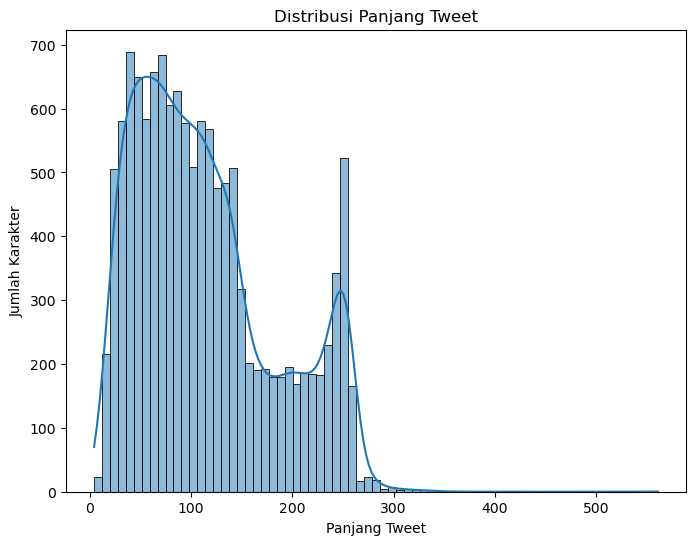

In [23]:
# 3. Grafik distribusi panjang tweet
plt.figure(figsize=(8, 6))
sns.histplot(df_new['tweet_length'], kde=True)
plt.xlabel('Panjang Tweet')
plt.ylabel('Jumlah Karakter')
plt.title('Distribusi Panjang Tweet')
plt.savefig('Result\Distribusi Panjang Tweet.png')
plt.show()

In [24]:
# 4. Kata-kata yang paling sering muncul
words_frequency = df_new['Tweet'].str.split(expand=True).stack().value_counts()
print("Kata paling sering digunakan:")
words_frequency

Kata paling sering digunakan:


USER               14665
yg                  2688
dan                 2484
di                  2477
yang                1768
                   ...  
sisturrr.\nTapi        1
:(\n\nEh               1
bentar,                1
Ndre,                  1
ngasih(":              1
Length: 53622, dtype: int64

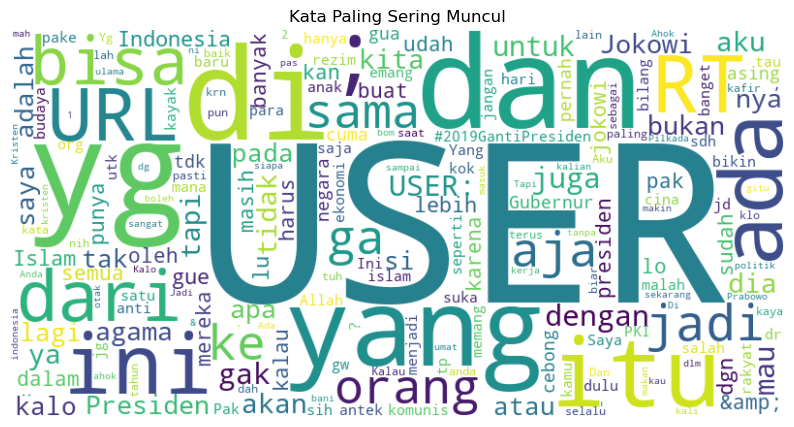

In [25]:
# Visualisasi data paling sering muncul
words_frequency = df_new['Tweet'].str.split(expand=True).stack().value_counts()

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_frequency)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Paling Sering Muncul')
plt.savefig('Result\Kata Paling Sering Muncul.png')
plt.show()

In [26]:
# 5. Menghitung Frekuensi setiap Kategori
Hate_Speech = df_new['HS'].value_counts().to_dict()
Abusive = df_new['Abusive'].value_counts().to_dict()
Individual = df_new['HS_Individual'].value_counts().to_dict()
Group = df_new['HS_Group'].value_counts().to_dict()
Religion = df_new['HS_Religion'].value_counts().to_dict()
Race = df_new['HS_Race'].value_counts().to_dict()
Physical = df_new['HS_Physical'].value_counts().to_dict()
Gender = df_new['HS_Gender'].value_counts().to_dict()
Other =  df_new['HS_Other'].value_counts().to_dict()
Weak = df_new['HS_Weak'].value_counts().to_dict()
Moderate = df_new['HS_Moderate'].value_counts().to_dict()
Strong = df_new['HS_Strong'].value_counts().to_dict()
print("Frekuensi dalam Setiap Kategori:")
print("HS:", Hate_Speech.get(1,0))
print("Abusive:", Abusive.get(1,0))
print("HS_Individual:", Individual.get(1, 0))
print("HS_Group:", Group.get(1, 0))
print("HS_Religion:", Religion.get(1, 0))
print("HS_Race:", Race.get(1, 0))
print("HS_Physical:", Physical.get(1, 0))
print("HS_Gender:", Gender.get(1, 0))
print("HS_Other:", Other.get(1, 0))
print("HS_Weak:", Weak.get(1,0))
print("HS_Moderate:", Moderate.get(1,0))
print("HS_Strong:",Strong.get(1,0))

Frekuensi dalam Setiap Kategori:
HS: 5518
Abusive: 5005
HS_Individual: 3540
HS_Group: 1978
HS_Religion: 789
HS_Race: 563
HS_Physical: 322
HS_Gender: 304
HS_Other: 3706
HS_Weak: 3348
HS_Moderate: 1698
HS_Strong: 472


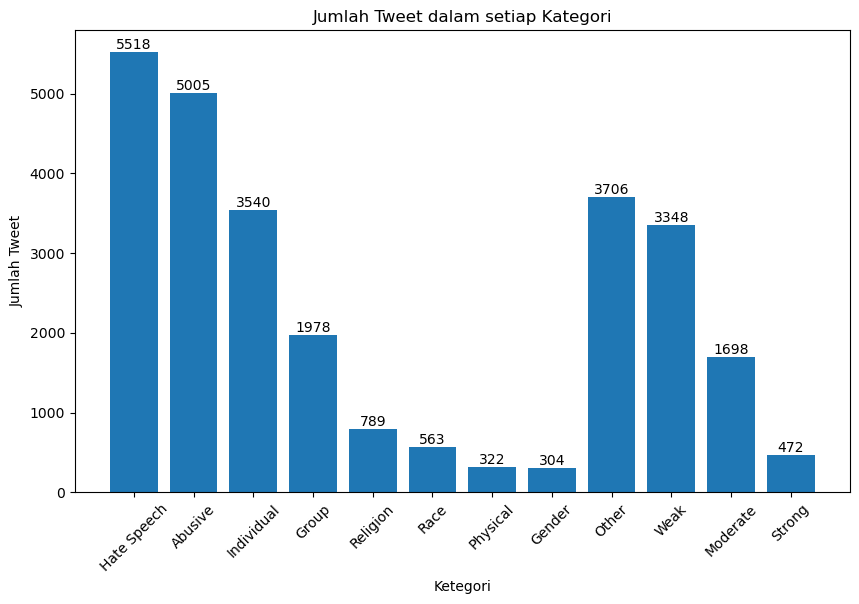

In [27]:
# visualisasi
categories = ['Hate Speech', 'Abusive', 'Individual', 'Group', 'Religion', 'Race', 'Physical', 'Gender', 'Other', 'Weak', 'Moderate', 'Strong']
values = [Hate_Speech[1], Abusive[1], Individual[1], Group[1], Religion[1], Race[1], Physical[1], Gender[1], Other[1], Weak[1], Moderate[1], Strong[1]]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.title('Jumlah Tweet dalam setiap Kategori')
plt.xlabel('Ketegori')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=45)
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.savefig('Result\Jumlah Tweet per Kategori.png')
plt.show()

Penggunaan Hate Speech:
Tidak Mengandung Hate Speech: 7526
Mengandung Hate Speech: 5518


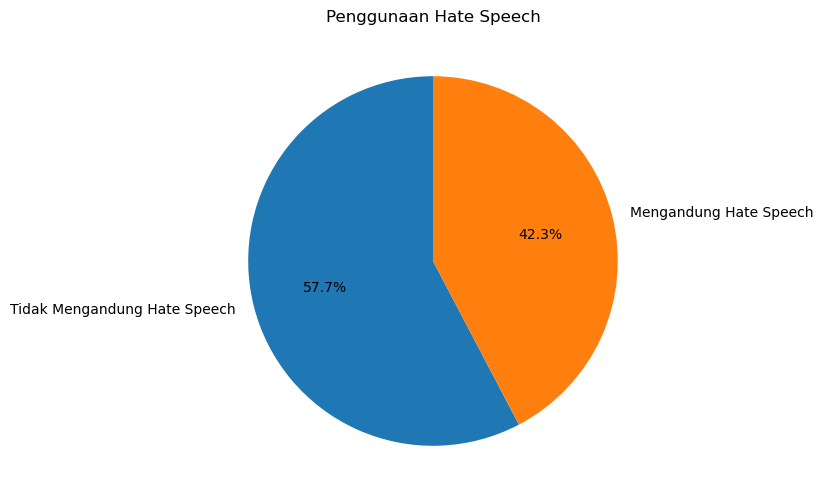

In [28]:
# 6. Analisis sentimen Hate Speech
sentiment_counts = df_new['HS'].value_counts()
labels = {0: "Tidak Mengandung Hate Speech", 1: "Mengandung Hate Speech"}
print("Penggunaan Hate Speech:")
for value, count in sentiment_counts.items():
    sentiment_label = labels.get(value, "unknown")
    print(f"{sentiment_label}: {count}")
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=labels.values(), autopct='%1.1f%%', startangle=90)
plt.title("Penggunaan Hate Speech")
plt.savefig('Result\Penggunaan Hate Speech.png')
plt.show()

Penggunaan Abusive Words:
Tidak Mengandung Abusive Words: 8039
Mengandung Abusive Words: 5005


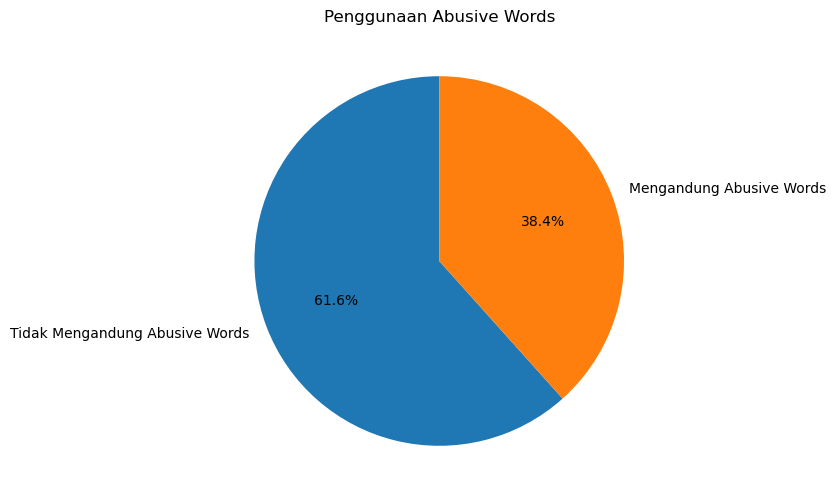

In [29]:
# 7. Analisis sentimen Abusive Words
sentiment_count = df_new['Abusive'].value_counts()
labels = {0: "Tidak Mengandung Abusive Words", 1: "Mengandung Abusive Words"}
print("Penggunaan Abusive Words:")
for value, count in sentiment_count.items():
    sentiment_label = labels.get(value, "unknown")
    print(f"{sentiment_label}: {count}")
# visualisasi
labels = ["Tidak Mengandung Abusive Words", "Mengandung Abusive Words"]
plt.figure(figsize=(6, 6))
plt.pie(sentiment_count, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Penggunaan Abusive Words')
plt.savefig('Result\Penggunaan Abusive Words.png')
plt.show()

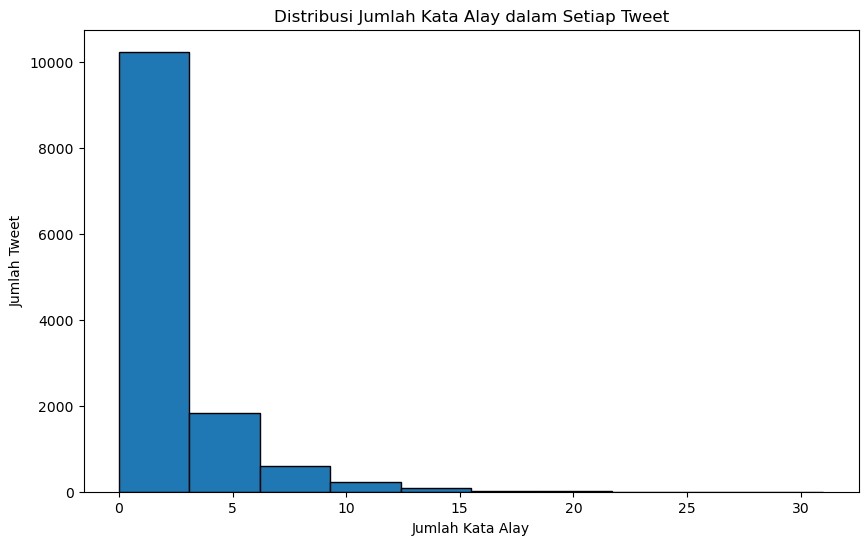

In [30]:
# 8. Analisis Penggunaan Kata Alay
jumlah_kata_alay = df_new['Jumlah_Kata_Alay']
plt.figure(figsize=(10, 6))
plt.hist(jumlah_kata_alay, bins=10, edgecolor='black')
plt.title('Distribusi Jumlah Kata Alay dalam Setiap Tweet')
plt.xlabel('Jumlah Kata Alay')
plt.ylabel('Jumlah Tweet')
plt.savefig('Result\Distribusi Jumlah Kata Alay.png')
plt.show()

In [31]:
summary_value = df_new['Jumlah_Kata_Alay'].value_counts().reset_index()
summary_value

,index,Jumlah_Kata_Alay
0,0,4499
1,1,2626
2,2,1813
3,3,1304
4,4,903
5,5,549
6,6,385
7,7,259
8,8,216
9,9,130


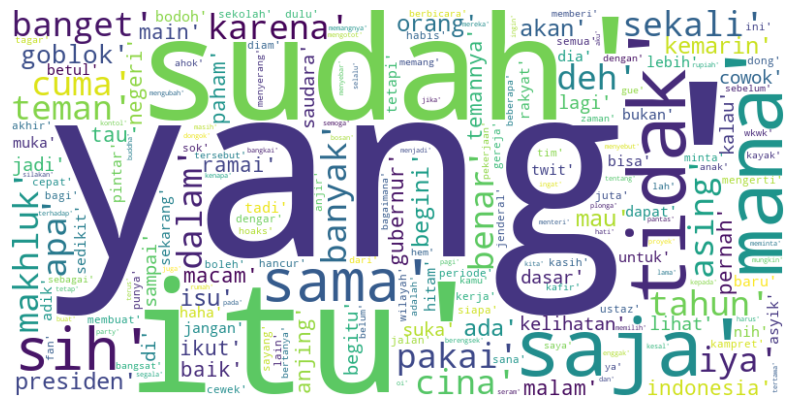

In [32]:
# Visualisasi Penggunaan Kata Alay
all_kata_alay =' '.join([word for word in df_new['Kata_Alay'].map(str).str.split().explode().unique().tolist() if not isinstance(word, float)])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_kata_alay)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('')
plt.savefig('Result\Kata Alay.png')
plt.show()

In [33]:
# Menampilkan top 10 tweet dengan kata alay terbanyak
top_10_alay_tweets = df_new.sort_values(by='Jumlah_Kata_Alay', ascending=False).head(10)['Tweet']
for index, tweet in enumerate(top_10_alay_tweets, start=1):
    print(f"Tweet {index}: {tweet}")

Tweet 1: jan di biasain nganggep cewe ntu kek barang bos, karna cewe ntu punya ati n prasaan. situ kalo cuman nyari bahan bakal ngeue mending lu cari pecun sono, bs lu eue trs bayar, trs udeh deh masing2. jan cewe bae2 lu rusakin, di lobi sbisa lu ampe dpt ngeue, hanjer sampah amat'
Tweet 2: USER Blm jd gub aja sdh nabrak etika, gmn kl menjabat? Emg yg lantik dia kl jd gub dukun ya ato capres? Kl ga seneng sm presiden yg menjabat ya jgn mau dilantik sm beliau jd jgn jd cagub skr, ntar aja kl yg dia dukung sdh jd presiden br nyagub..'
Tweet 3: USER USER Si joko pngen ttep populer buat pro-nas d jkt, si ahok jga g mw klah buat jga proyek2 lain d jkt, akhirnya 1 pmbngunan blom slsai tp udh bngun lgi yg lain d ruas2 utama yg sling brdekatan. Skrg cebong guoblok mlah nyalahin ani
Tweet 4: Dan sampailah masku d rmh ga mnt d ceritain ud crita langsung\nTrnyta si gembrot dr awal ud g kuat dan pingsan masku trnyta ud bantuin ngedorong juga\nHoalaaah mbrot mbrot\nGembrot blg kalo ketahuan mamany

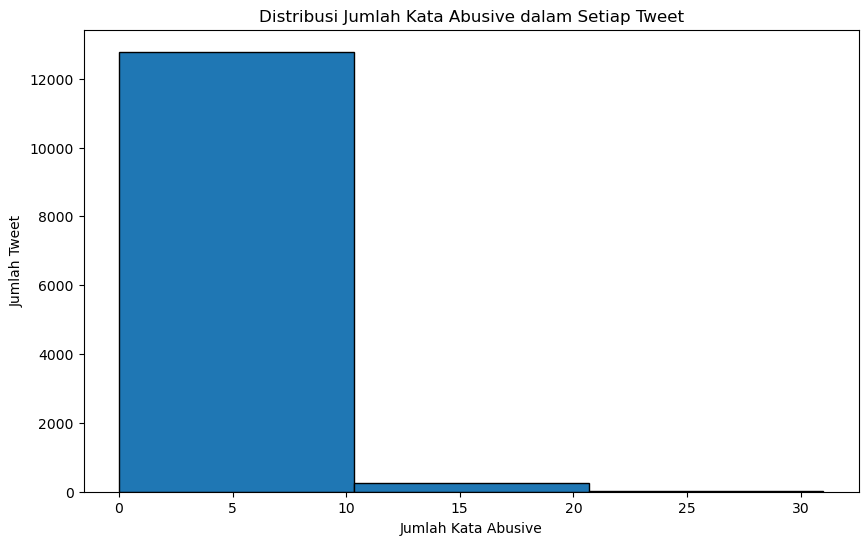

In [34]:
# 9. Analisis Penggunaan Kata Abusive
jumlah_kata_abusive = df_new['Jumlah_Kata_Abusive']
plt.figure(figsize=(10, 6))
plt.hist(jumlah_kata_alay, bins=3, edgecolor='black')
plt.title('Distribusi Jumlah Kata Abusive dalam Setiap Tweet')
plt.xlabel('Jumlah Kata Abusive')
plt.ylabel('Jumlah Tweet')
plt.savefig('Result\Distribusi Kata Abusive.png')
plt.show()

In [35]:
summary_per_value = df_new['Jumlah_Kata_Abusive'].value_counts().reset_index()
summary_per_value

,index,Jumlah_Kata_Abusive
0,0,9203
1,1,3231
2,2,500
3,3,81
4,4,23
5,6,3
6,5,2
7,8,1


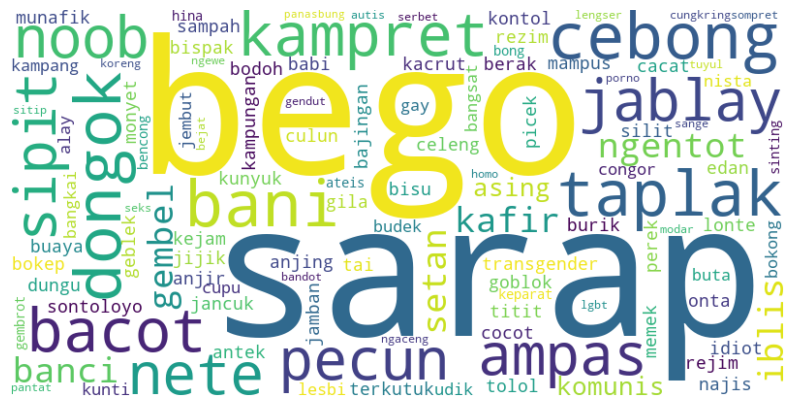

In [36]:
# Visualisasi Penggunaan Kata Abusive
all_kata_abusive =' '.join([word for word in df_new['Kata_Abusive'].map(str).str.split().explode().unique().tolist() if not isinstance(word, float)])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_kata_abusive)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('')
plt.savefig('Result\Kata Abusive.png')
plt.show()

In [37]:
# Menampilkan top 10 tweet dengan kata abusive terbanyak
top_10_abusive_tweets = df_new.sort_values(by='Jumlah_Kata_Abusive', ascending=False).head(10)['Tweet']

for index, tweet in enumerate(top_10_abusive_tweets, start=1):
    print(f"Tweet {index}: {tweet}")

Tweet 1: Rizieq shihab fpi jancok asu kontol tempek anjing babi bajingan bangsat lonte balon banci bencong taek cabul pengecut cok teroris bubarkan ormas fpi #HTIMakar'
Tweet 2: USER Elo kafir banci yakk.. ya ampun? Sdh kafir banci lagi, jangan sedih ya cong.. lo Google deh kafir banci kayak lo..'
Tweet 3: USER Anjing tai goblok idiot bangsat monyet babi fucc, kont, ngents, goblok. \n\nIya tau kasar bgt maaf'
Tweet 4: #ILCPrabowoMenyerang ilc sukses undang orang gila karena ahok kalah ampe lupa potong kuping gila gila gila gila gila beneran \xf0\x9f\x98\x81'
Tweet 5: USER USER Hati2 sama bani onta ntar dinyinyirin bilangnya ahok si kafir pencitraan wkwkwkwkw hati2 bani onta lagi cari taktik buat nyinyir lagi \xf0\x9f\x98\x82\xf0\x9f\x98\x82\xf0\x9f\x98\x82\xf0\x9f\x98\x82'
Tweet 6: USER USER DPR DPRD jancok asu aanjing babi kontol jembut bajingan bangsat tempek gendeng taeeekkk banci'
Tweet 7: USER USER USER Golongan kaum bani kampret seperti katak dalam tempurung, teriak tong kosong, 

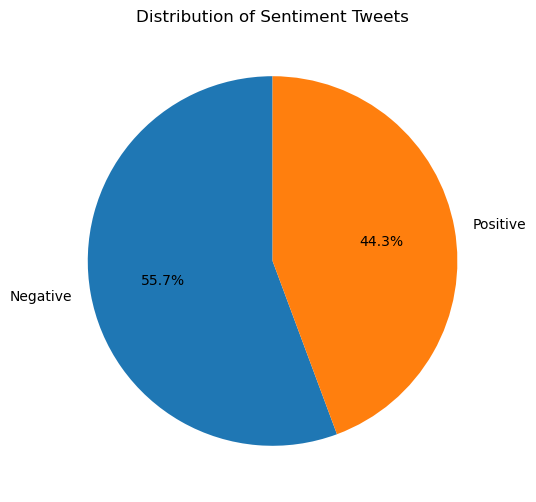

In [38]:
# 10. Sentiment positif negatif
# Count the values in the "In_Group" column
in_group_counts = df_new['In_Group'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(in_group_counts, labels=in_group_counts.index.map({0: "Positive", 1: "Negative"}), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Tweets')
plt.savefig('Result\Distribusi Sentiment.png')
plt.show()

In [39]:
in_group_counts = df_new['In_Group'].value_counts()
in_group_counts

1    7261
0    5783
Name: In_Group, dtype: int64

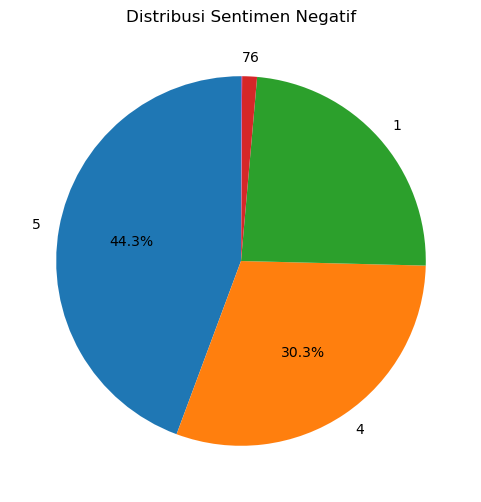

In [40]:
# Masuk berapa kategori Hate Speech
category_count = df_new[df_new['In_Group'] == 1]['Category_Count'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
wedges, _, autotexts = plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 0.01, 'edgecolor': 'white'})
for wedge, autotext in zip(wedges, autotexts):
    if wedge.theta2 - wedge.theta1 < 100:  
        autotext.set_visible(False)
    else:
        autotext.set_visible(True)
plt.title('Distribusi Sentimen Negatif')
plt.savefig('Result\Distribusi Sentimen Negatif.png')
plt.show()

In [41]:
summary_per_value = df_new['Category_Count'].value_counts().reset_index()
summary_per_value.columns = ['Category_Count', 'Count']
summary_per_value = summary_per_value.sort_values('Category_Count')
summary_per_value

,Category_Count,Count
0,0,5783
3,1,1743
2,4,2198
1,5,3219
4,6,94
5,7,7


### Analisis Bivariate ###

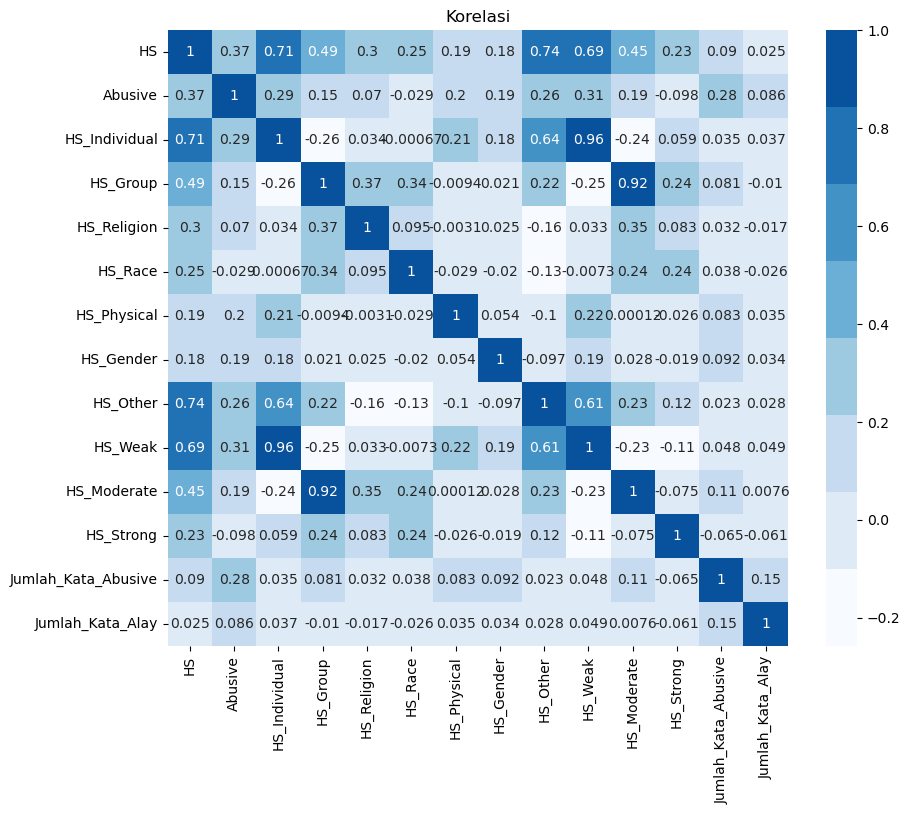

In [42]:
# 1. Correlation analysis
columns = ['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong','Jumlah_Kata_Abusive','Jumlah_Kata_Alay']
correlation_matrix = df_new[columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c'])
plt.title('Korelasi')
plt.savefig('Result\Heatmap Korelasi.png')
plt.show()

In [43]:
correlation_matrix = df_new[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong', 'Jumlah_Kata_Abusive','Jumlah_Kata_Alay']].corr().round(2)
correlation_matrix

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Jumlah_Kata_Abusive,Jumlah_Kata_Alay
HS,1.00,0.37,0.71,0.49,0.30,0.25,0.19,0.18,0.74,0.69,0.45,0.23,0.09,0.03
Abusive,0.37,1.00,0.29,0.15,0.07,-0.03,0.20,0.19,0.26,0.31,0.19,-0.10,0.28,0.09
HS_Individual,0.71,0.29,1.00,-0.26,0.03,-0.00,0.21,0.18,0.64,0.96,-0.24,0.06,0.03,0.04
HS_Group,0.49,0.15,-0.26,1.00,0.37,0.34,-0.01,0.02,0.22,-0.25,0.92,0.24,0.08,-0.01
HS_Religion,0.30,0.07,0.03,0.37,1.00,0.09,-0.00,0.02,-0.16,0.03,0.35,0.08,0.03,-0.02
HS_Race,0.25,-0.03,-0.00,0.34,0.09,1.00,-0.03,-0.02,-0.13,-0.01,0.24,0.24,0.04,-0.03
HS_Physical,0.19,0.20,0.21,-0.01,-0.00,-0.03,1.00,0.05,-0.10,0.22,0.00,-0.03,0.08,0.04
HS_Gender,0.18,0.19,0.18,0.02,0.02,-0.02,0.05,1.00,-0.10,0.19,0.03,-0.02,0.09,0.03
HS_Other,0.74,0.26,0.64,0.22,-0.16,-0.13,-0.10,-0.10,1.00,0.61,0.23,0.12,0.02,0.03
HS_Weak,0.69,0.31,0.96,-0.25,0.03,-0.01,0.22,0.19,0.61,1.00,-0.23,-0.11,0.05,0.05


In [44]:
# analisis korelasi
columns = ['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong','Jumlah_Kata_Abusive','Jumlah_Kata_Alay']
correlation_matrix = df_new[columns].corr()

sorted_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)
strongest_correlations = sorted_correlations[sorted_correlations != 1.0].index

for correlation in strongest_correlations:
    print(correlation, correlation_matrix.loc[correlation])

('HS_Weak', 'HS_Individual') 0.9628264315919214
('HS_Individual', 'HS_Weak') 0.9628264315919214
('HS_Group', 'HS_Moderate') 0.9150180108878444
('HS_Moderate', 'HS_Group') 0.9150180108878444
('HS', 'HS_Other') 0.7357275715283195
('HS_Other', 'HS') 0.7357275715283195
('HS', 'HS_Individual') 0.7127540210903446
('HS_Individual', 'HS') 0.7127540210903446
('HS_Weak', 'HS') 0.6862584107292095
('HS', 'HS_Weak') 0.6862584107292095
('HS_Other', 'HS_Individual') 0.6361948178859025
('HS_Individual', 'HS_Other') 0.6361948178859025
('HS_Weak', 'HS_Other') 0.6050783516382221
('HS_Other', 'HS_Weak') 0.6050783516382221
('HS', 'HS_Group') 0.4937522294428902
('HS_Group', 'HS') 0.4937522294428902
('HS', 'HS_Moderate') 0.4517921828562755
('HS_Moderate', 'HS') 0.4517921828562755
('HS_Group', 'HS_Religion') 0.3661386985116765
('HS_Religion', 'HS_Group') 0.3661386985116765
('HS', 'Abusive') 0.36529200550739316
('Abusive', 'HS') 0.36529200550739316
('HS_Religion', 'HS_Moderate') 0.34528987968260544
('HS_Modera

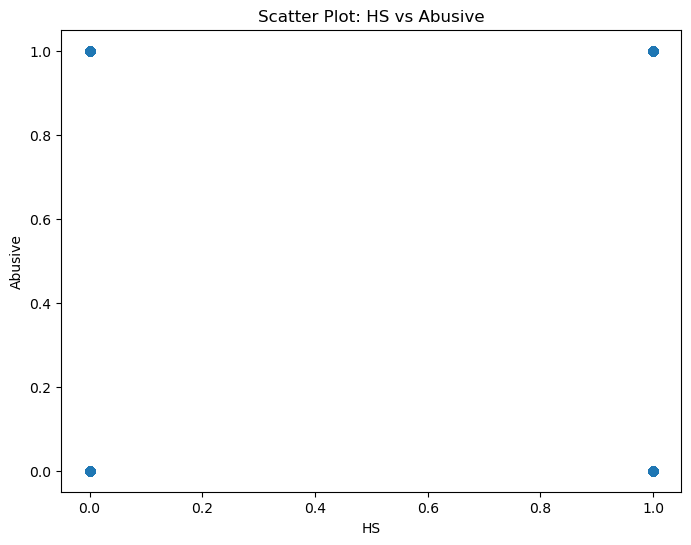

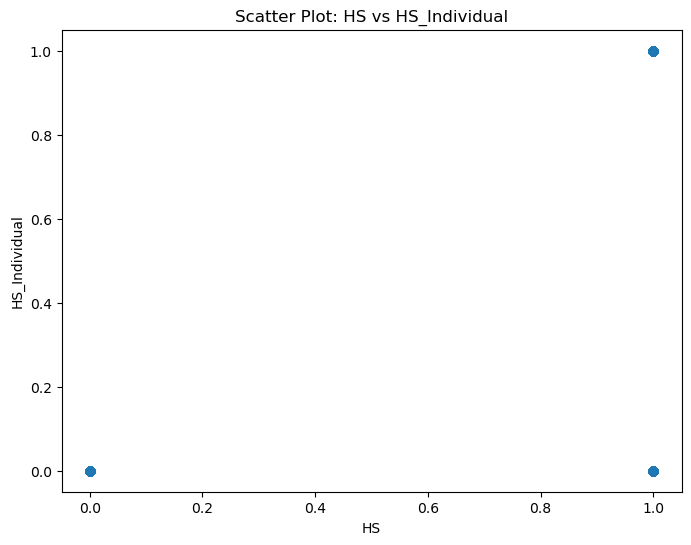

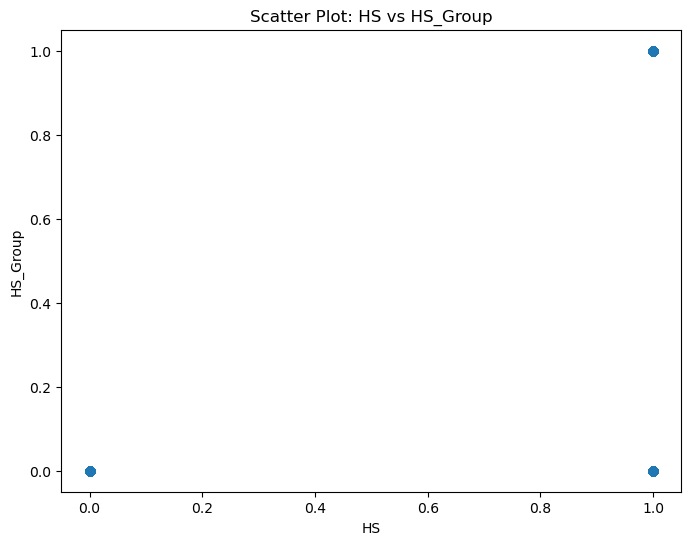

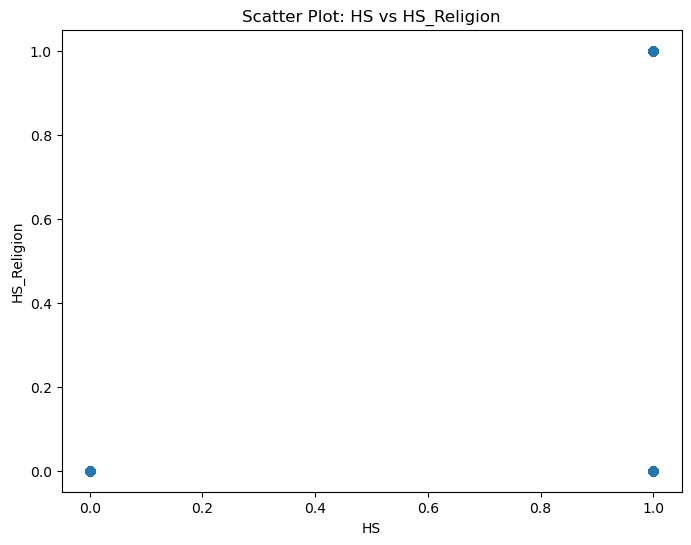

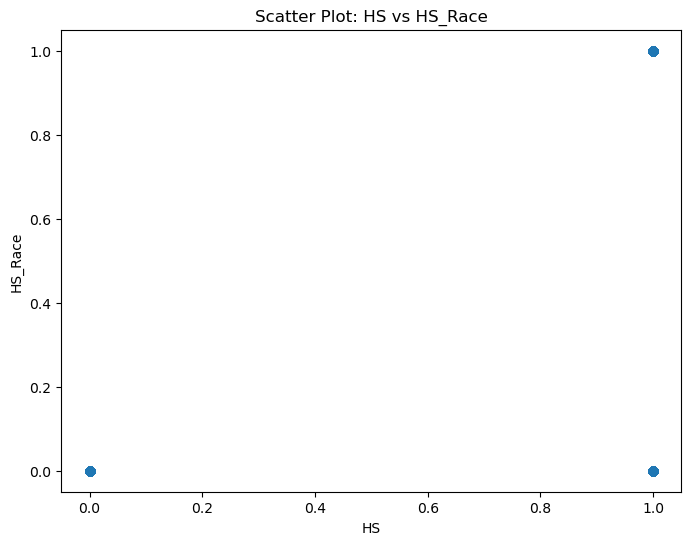

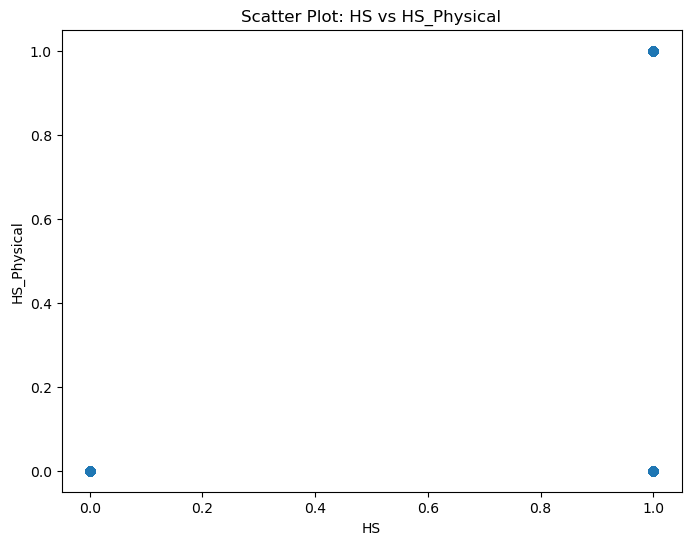

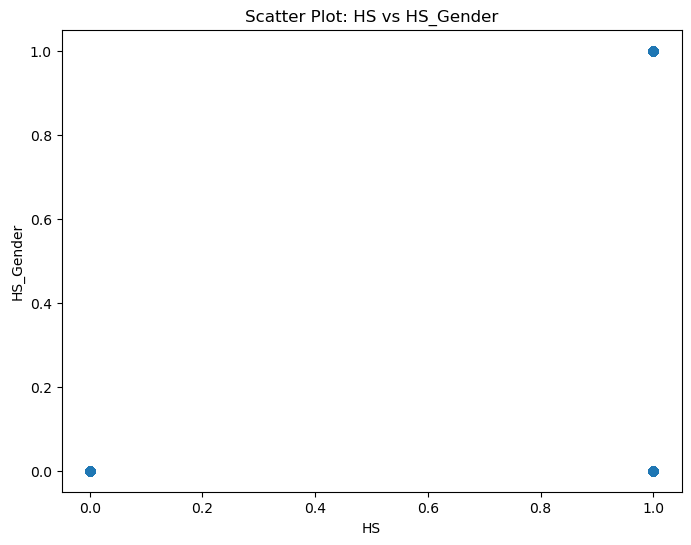

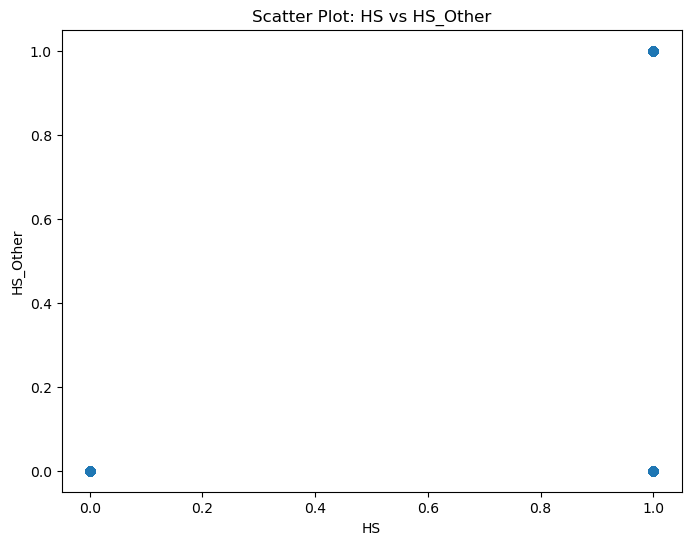

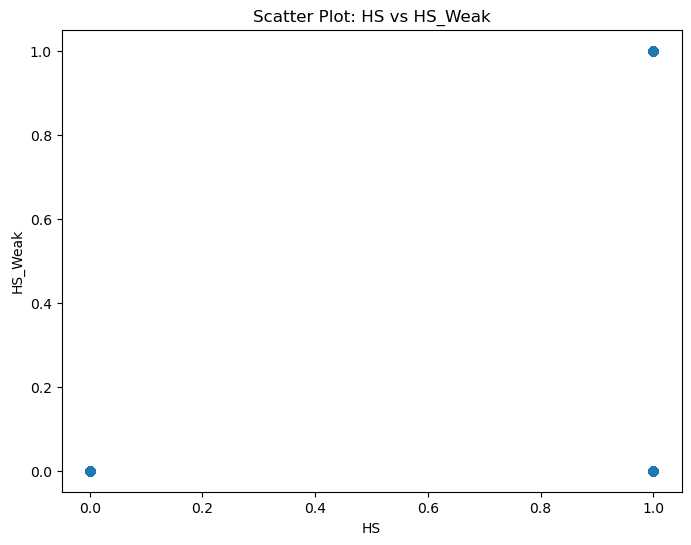

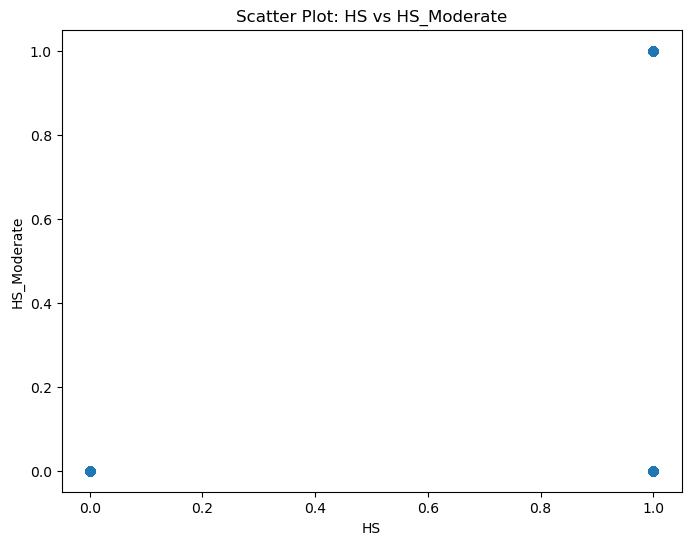

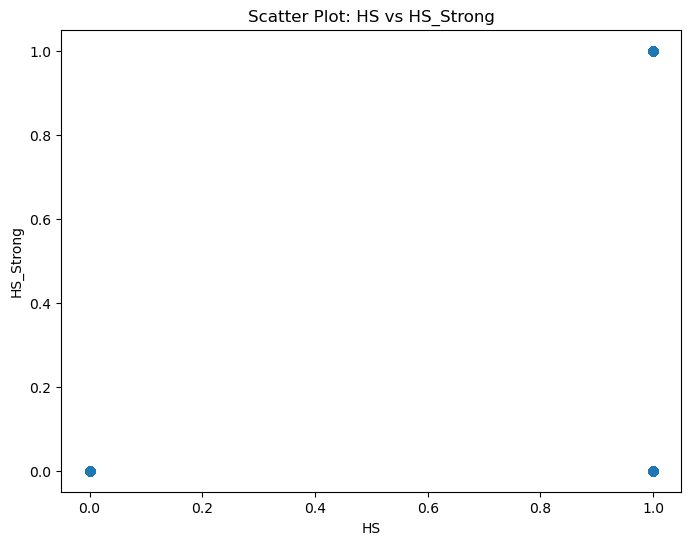

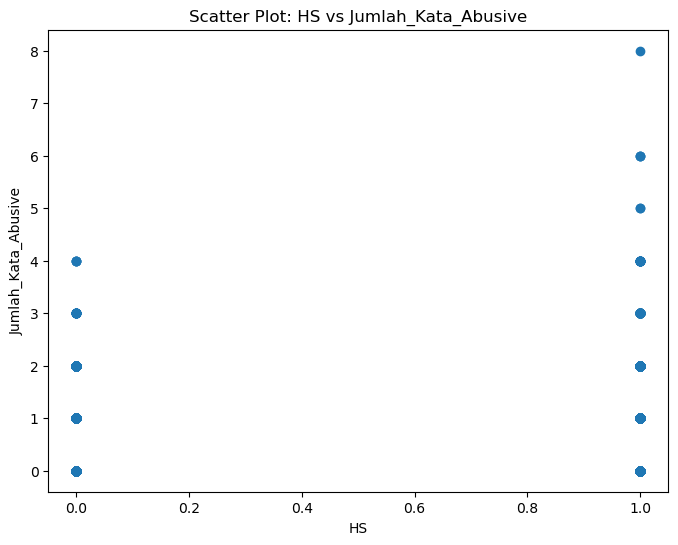

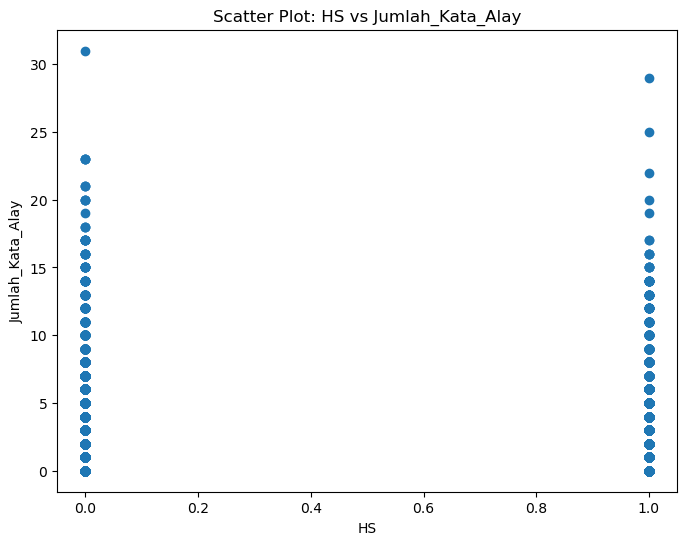

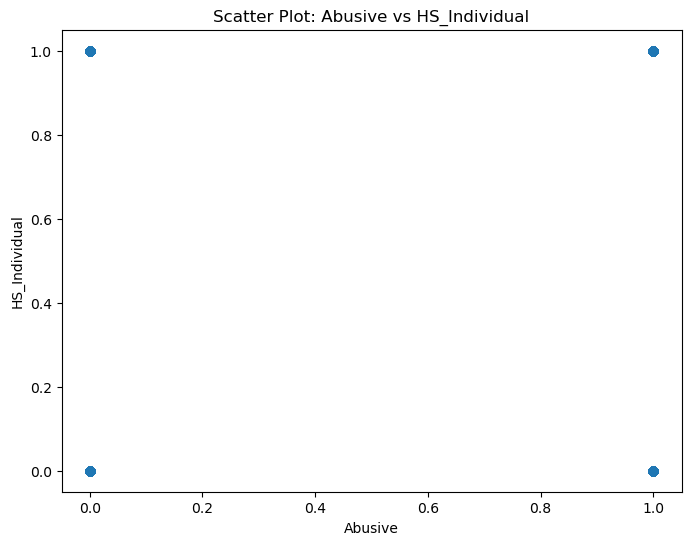

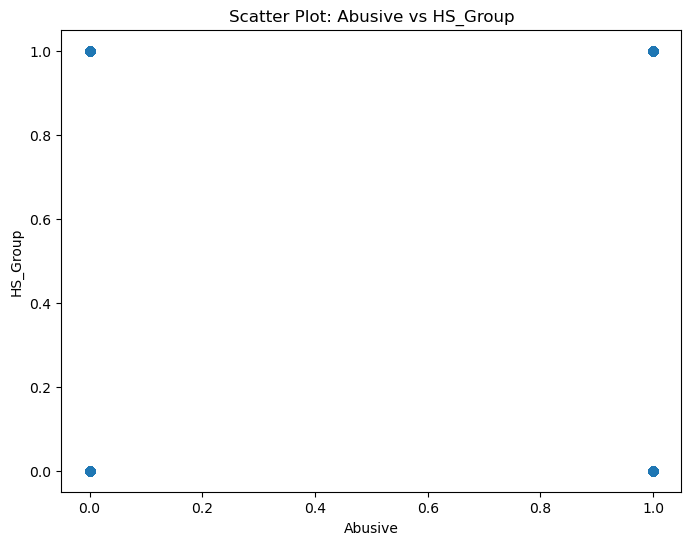

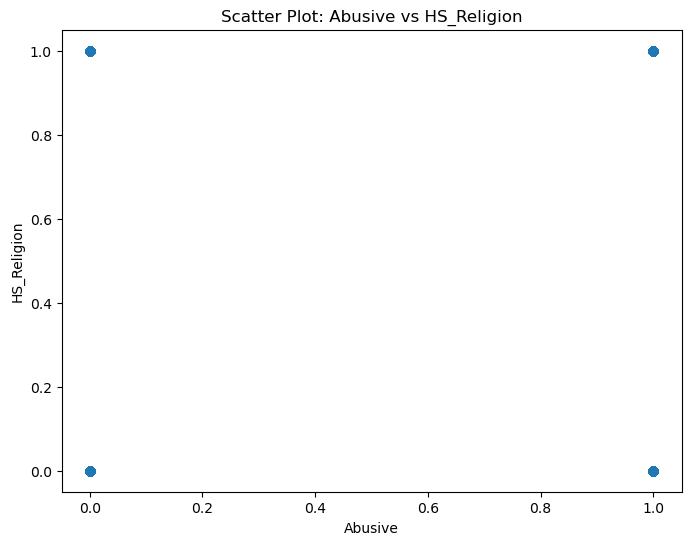

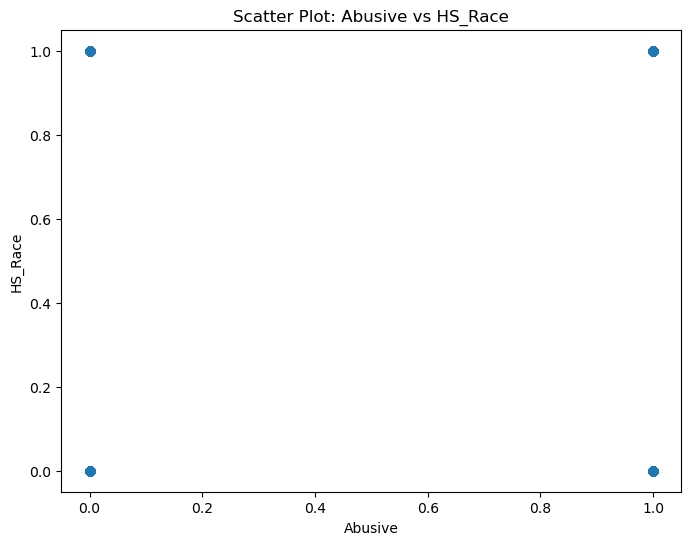

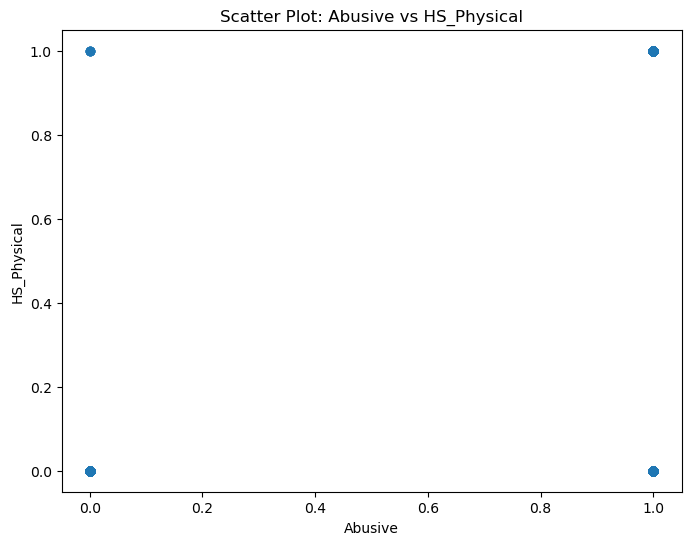

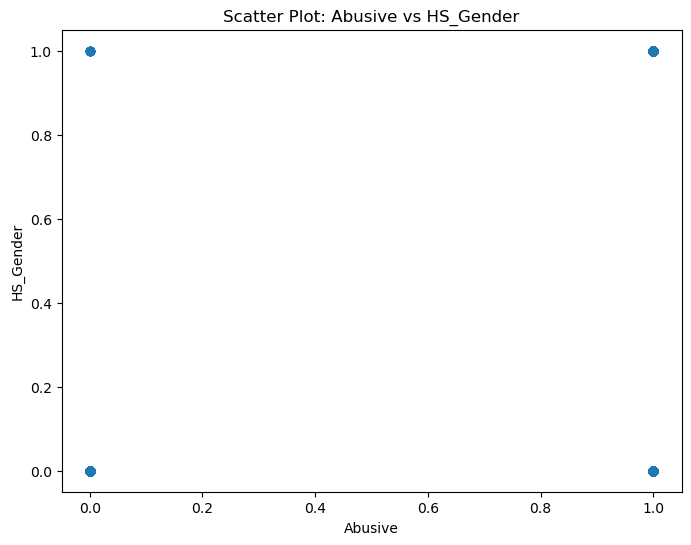

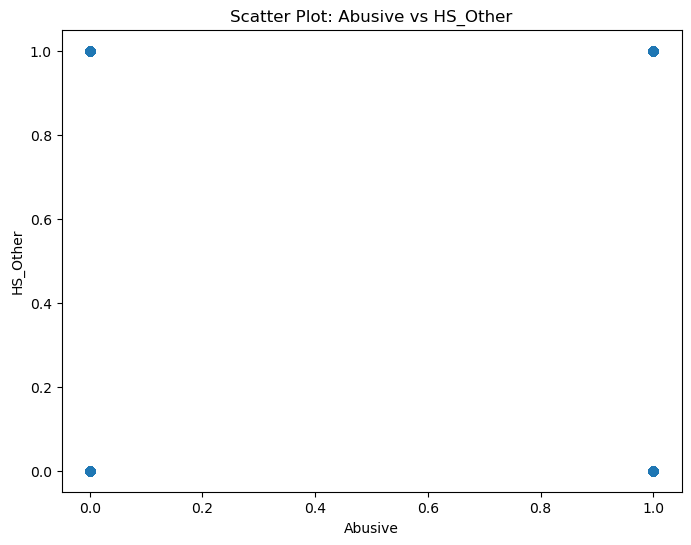

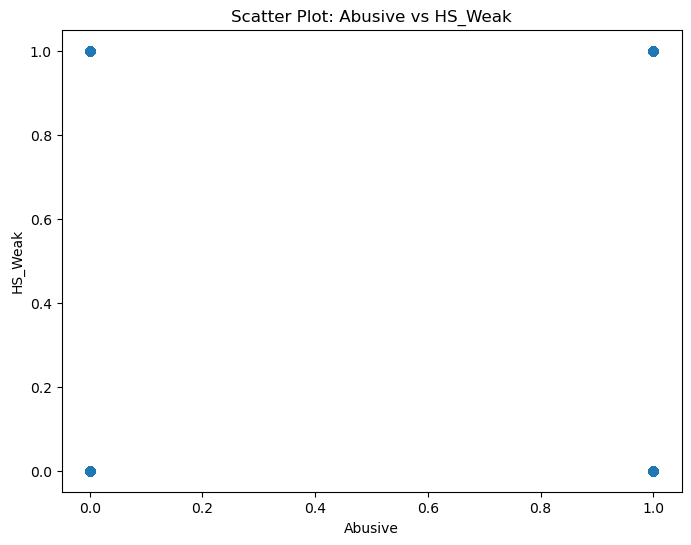

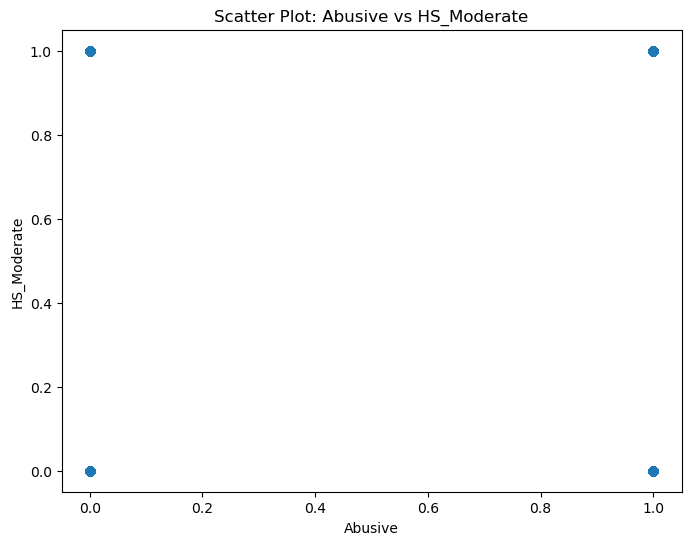

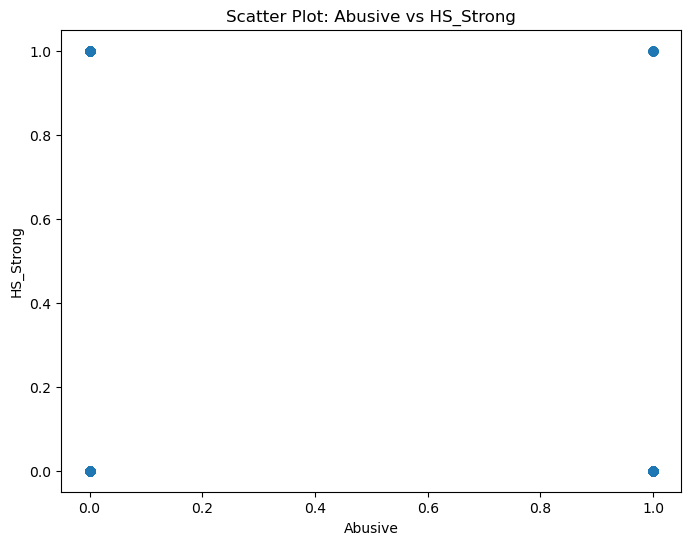

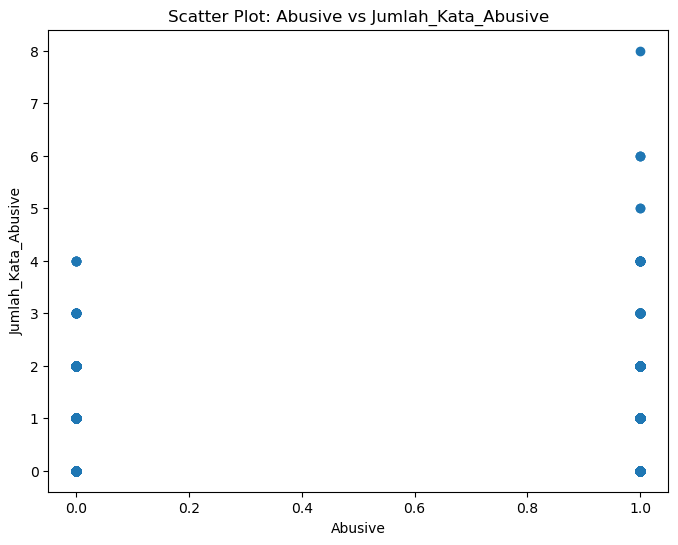

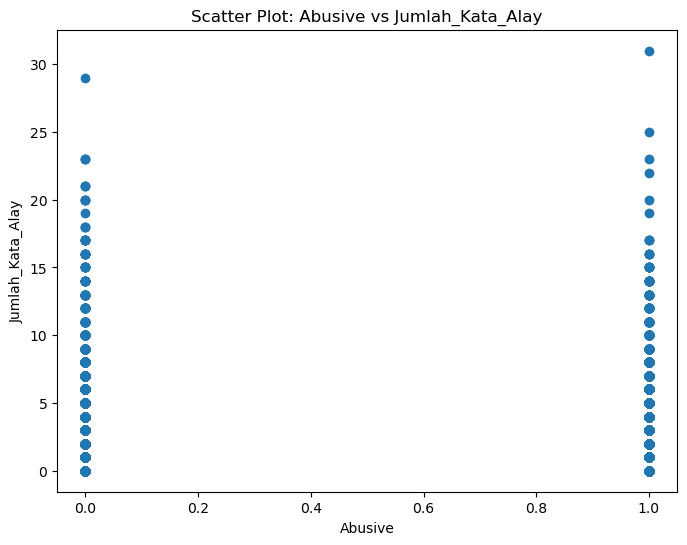

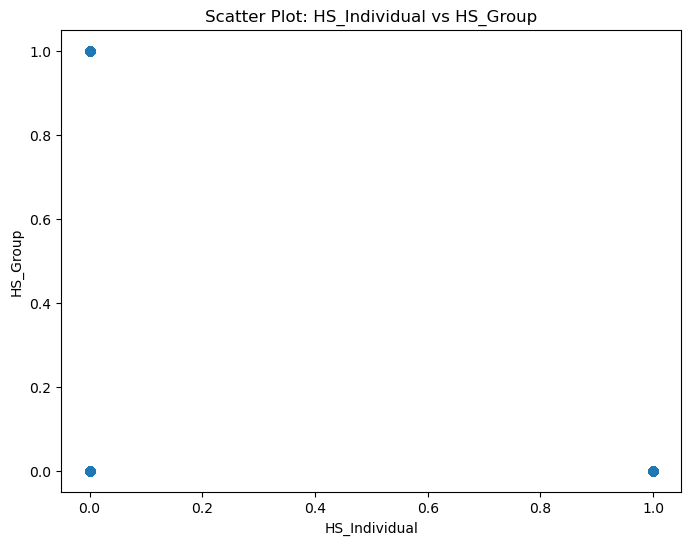

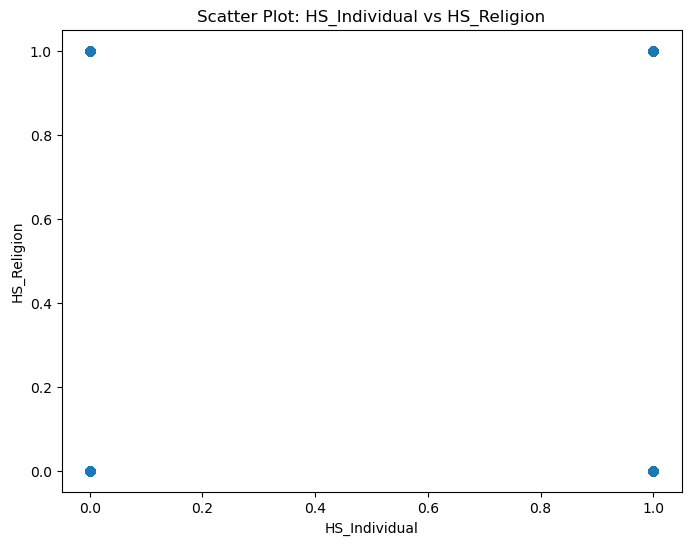

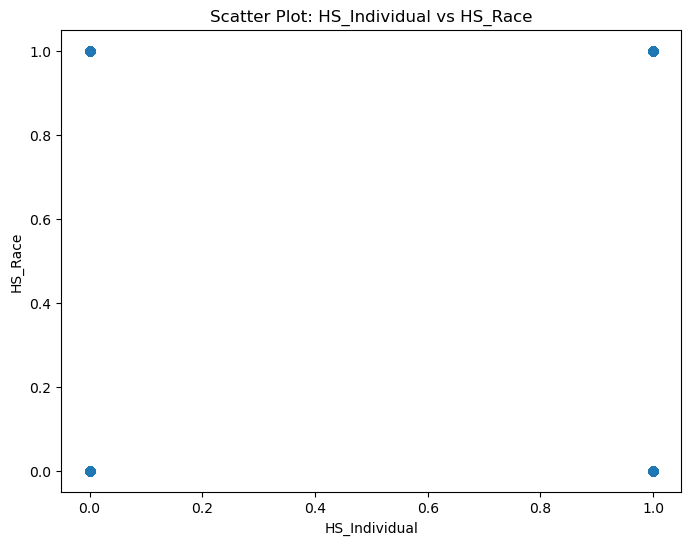

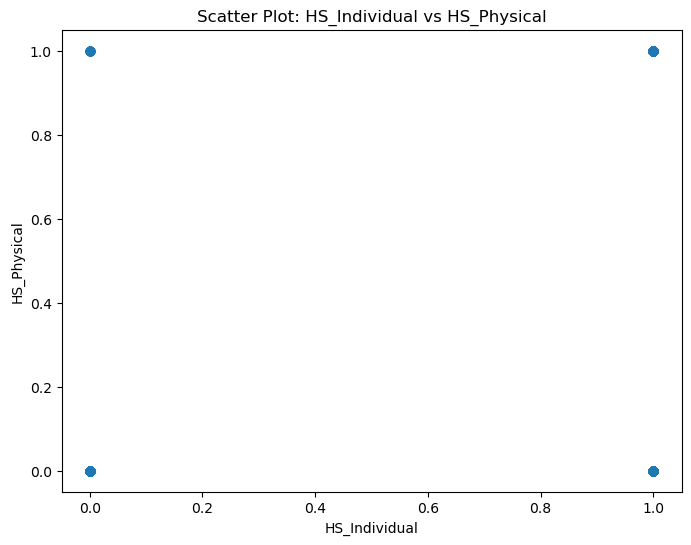

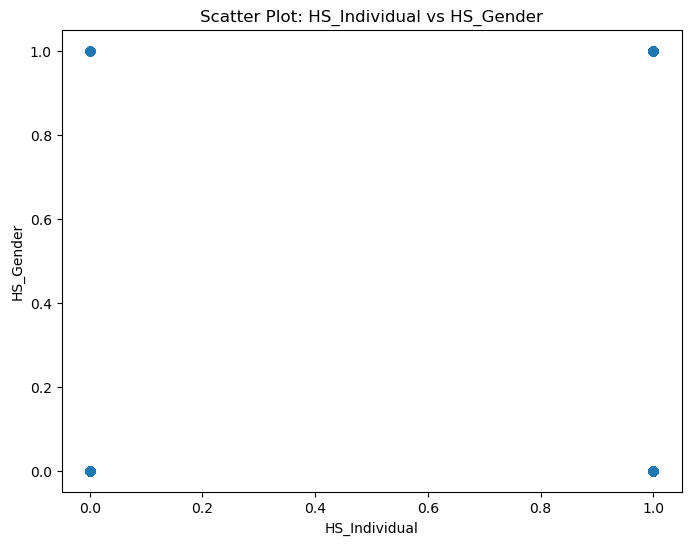

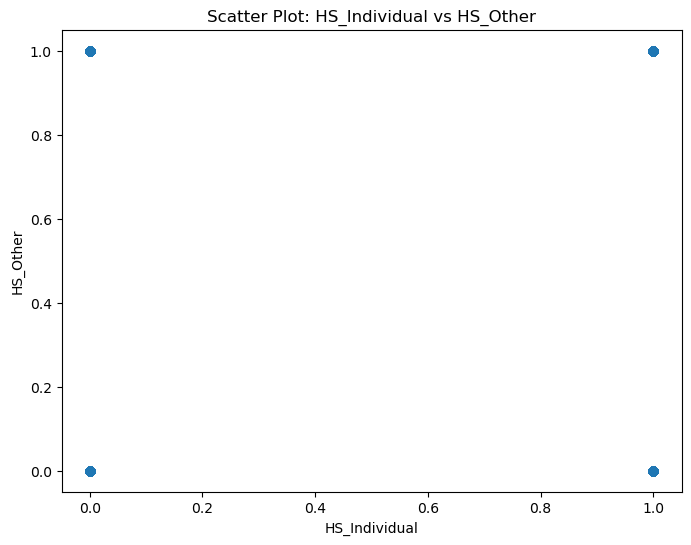

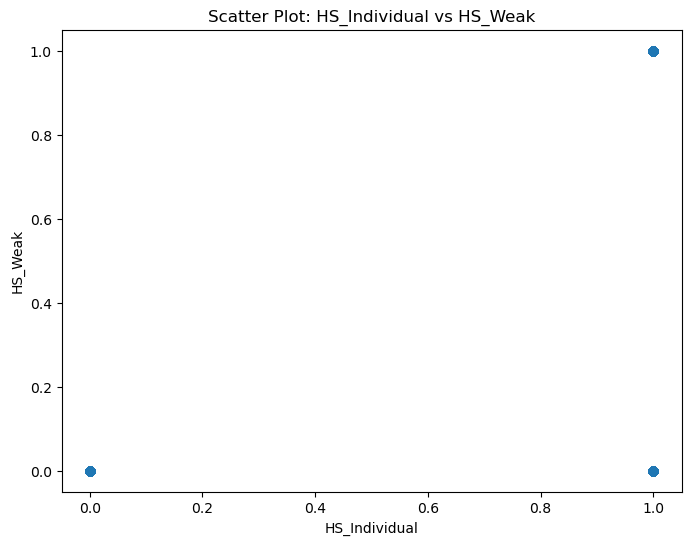

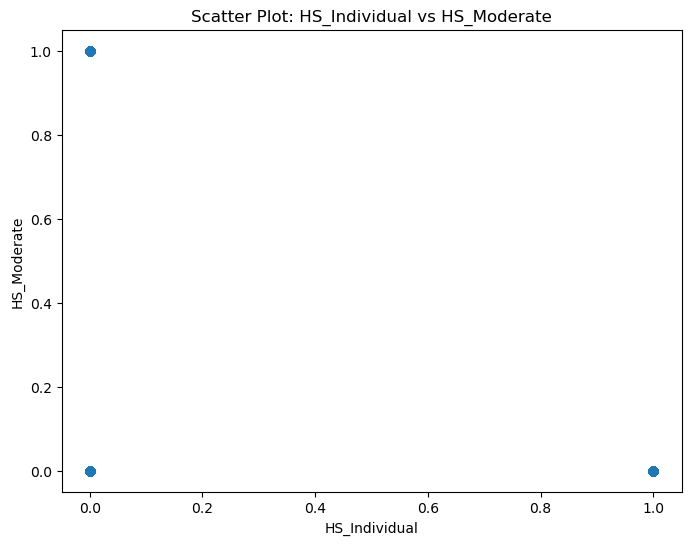

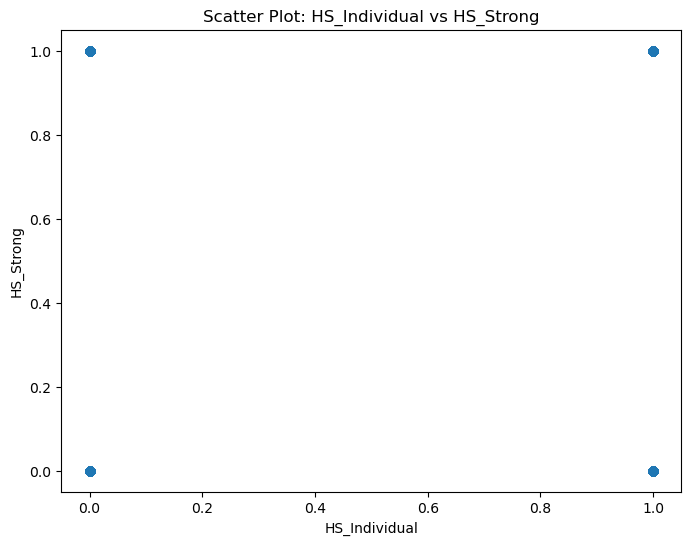

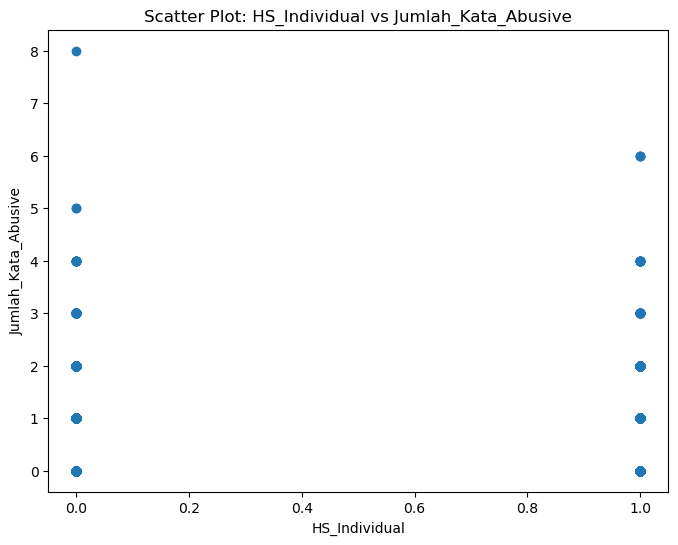

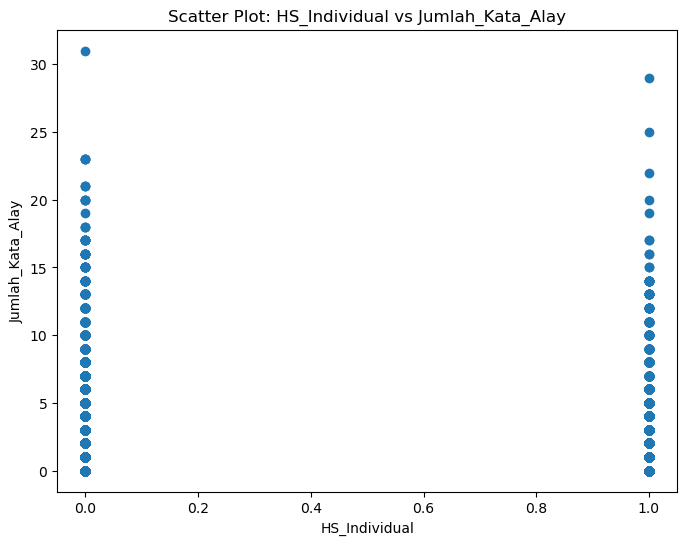

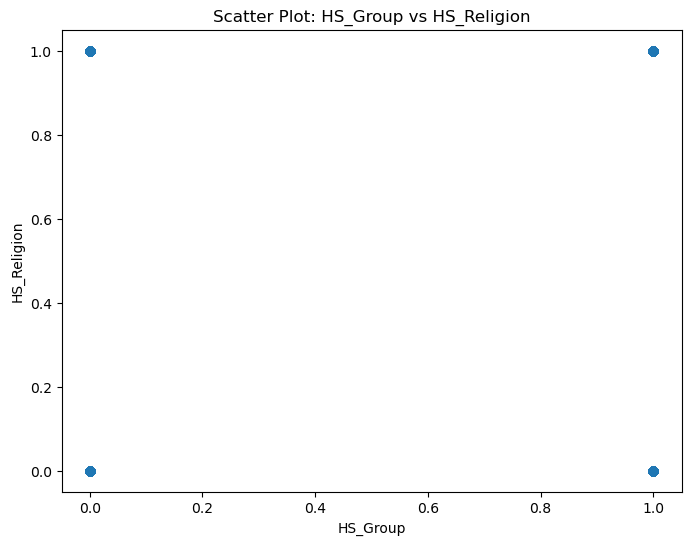

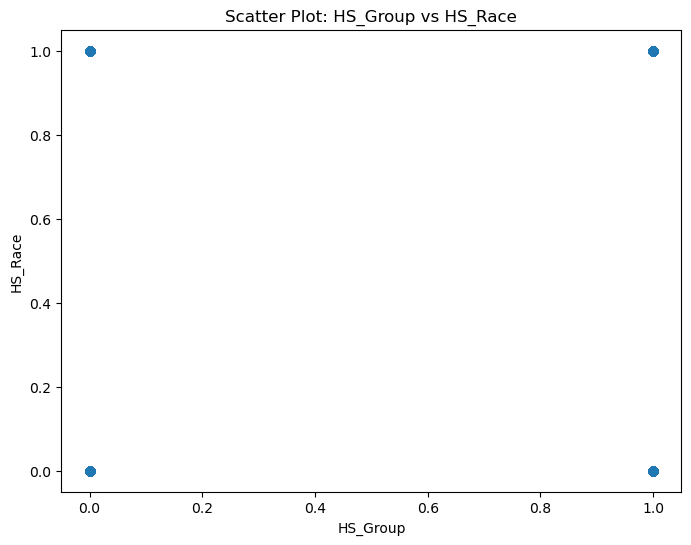

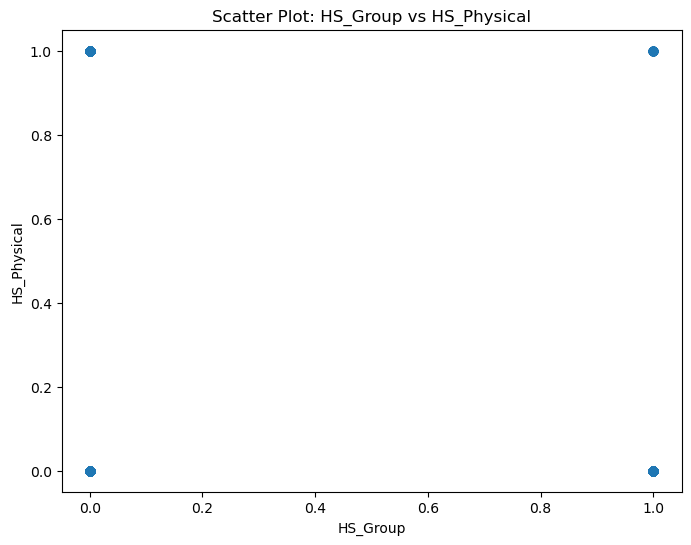

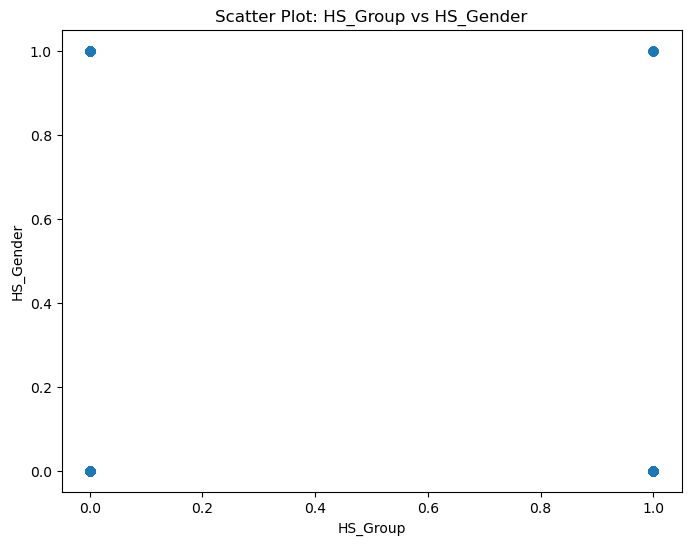

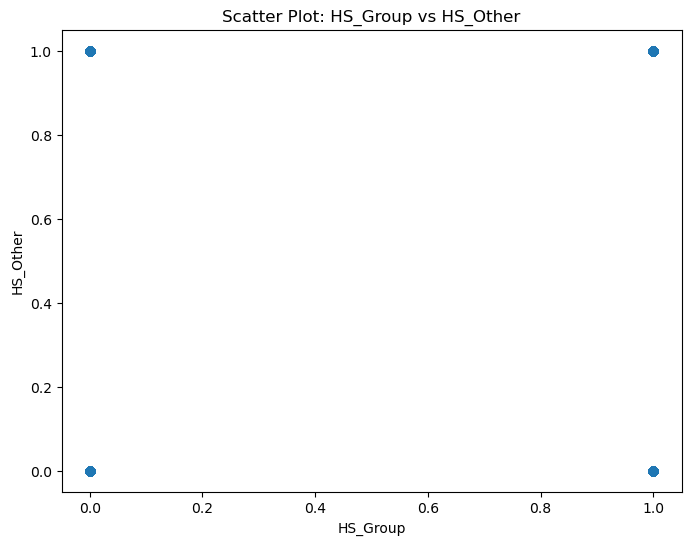

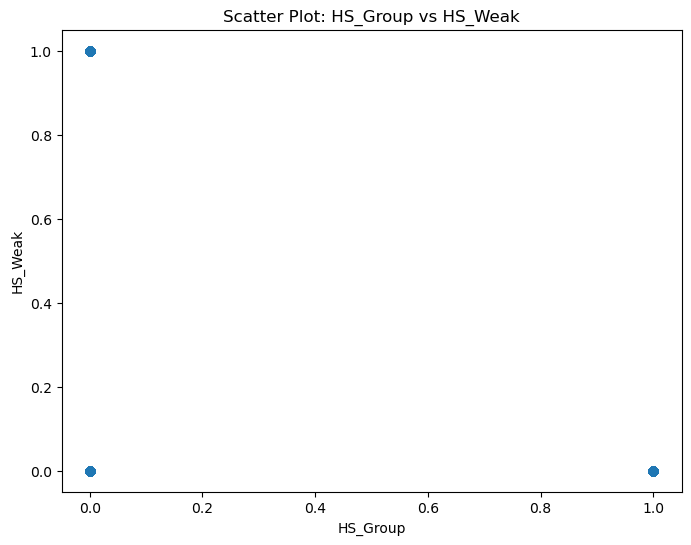

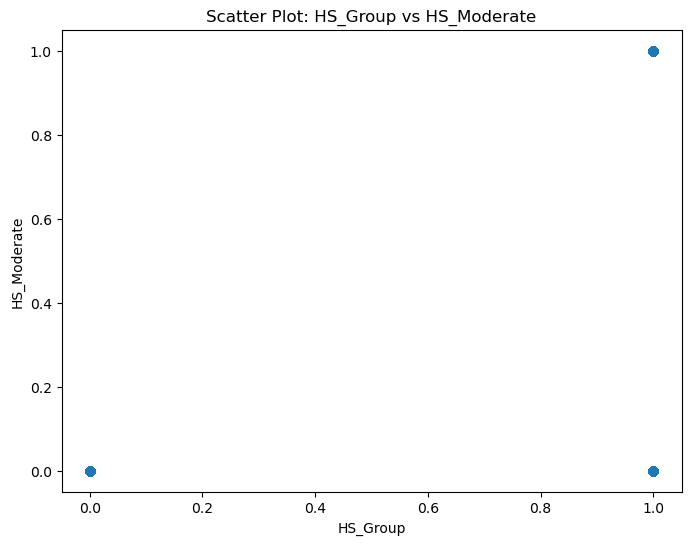

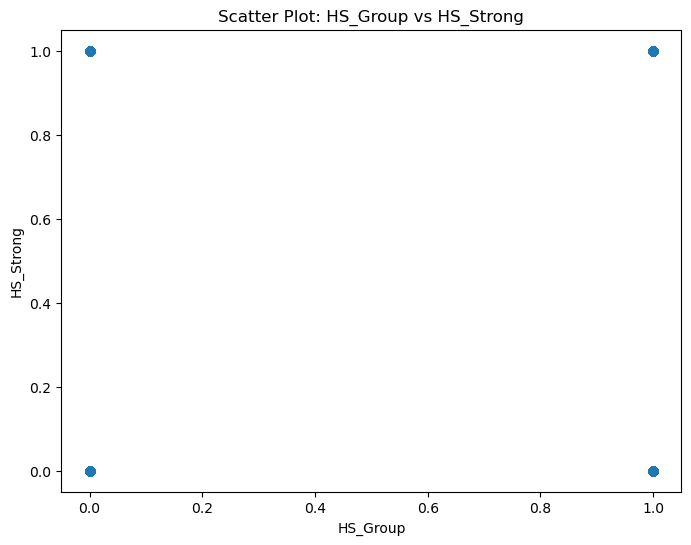

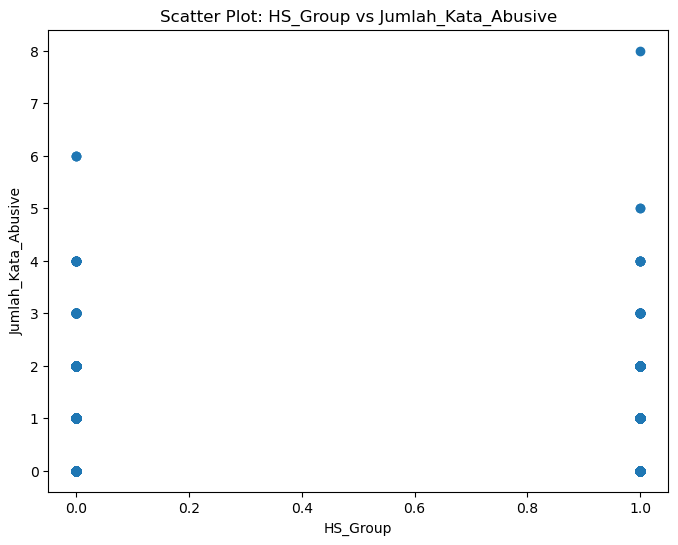

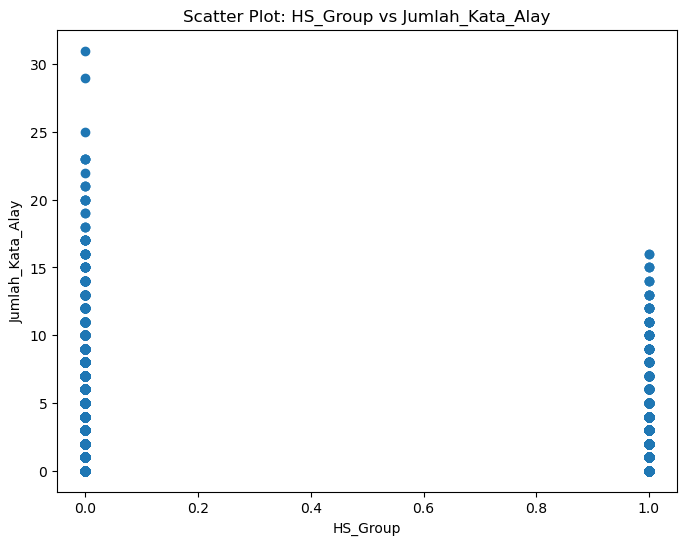

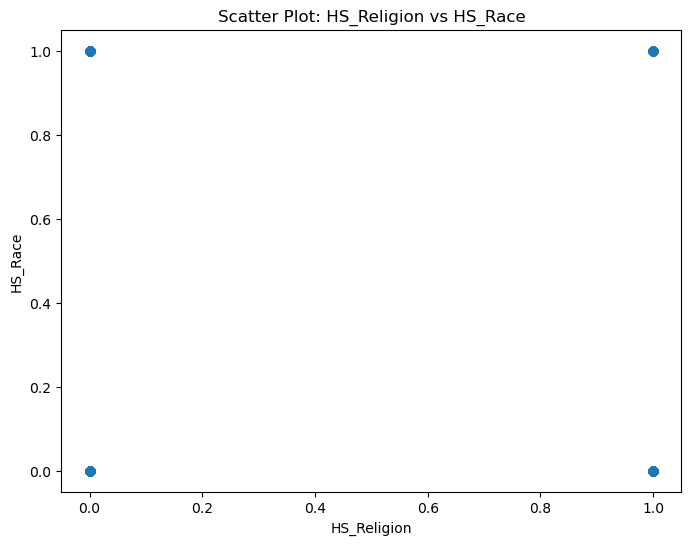

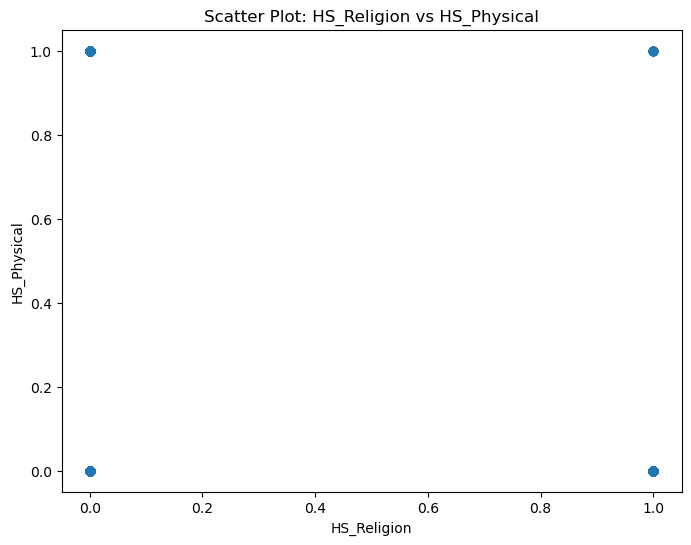

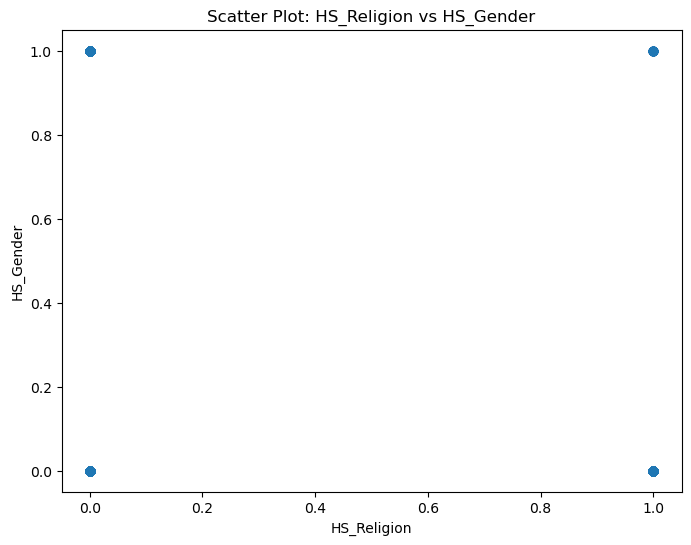

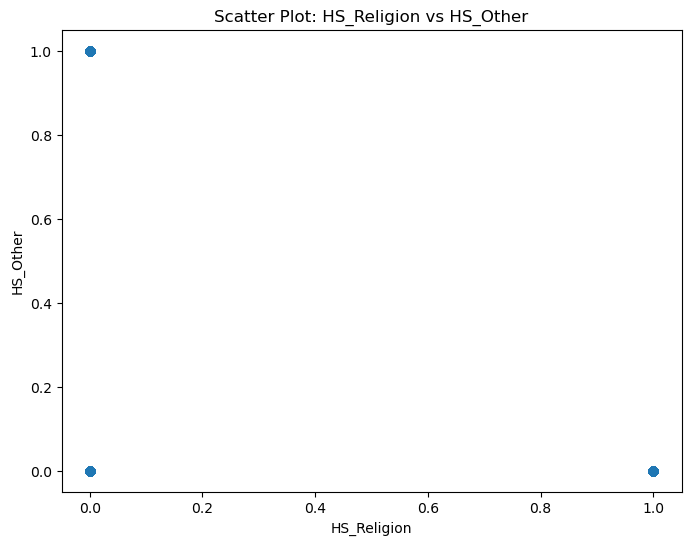

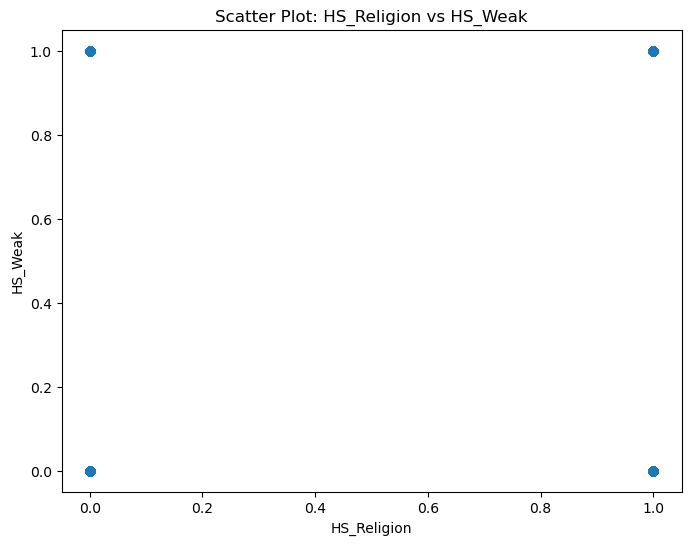

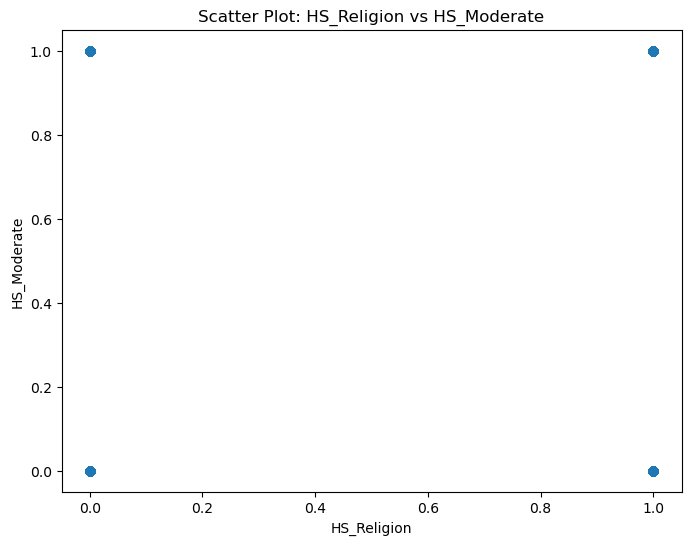

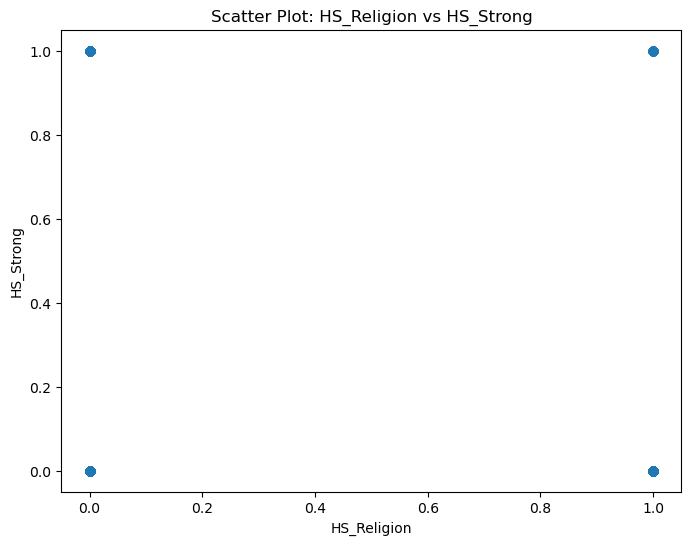

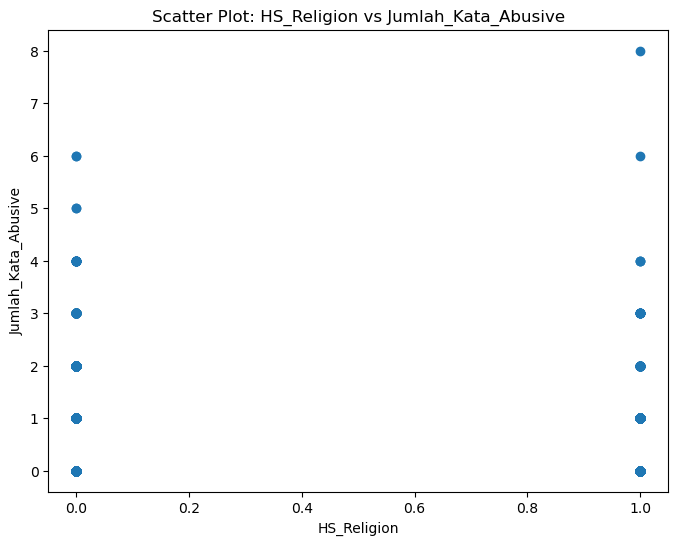

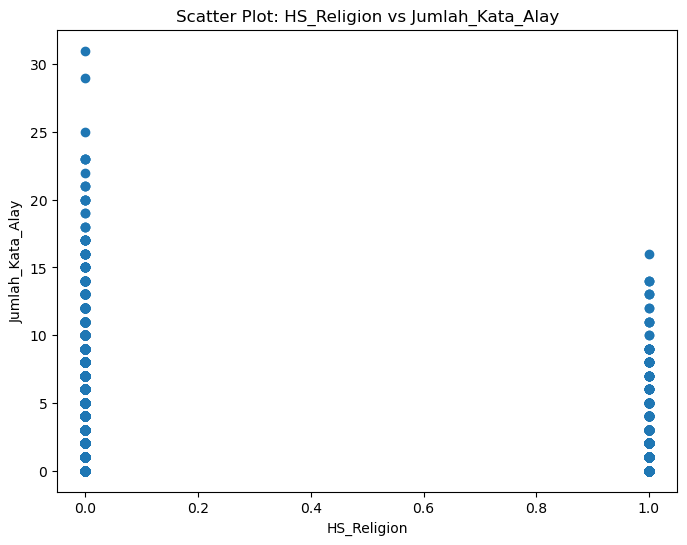

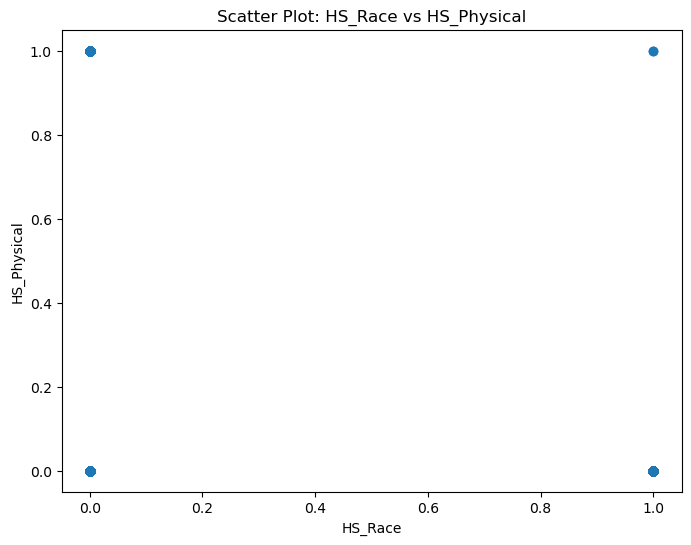

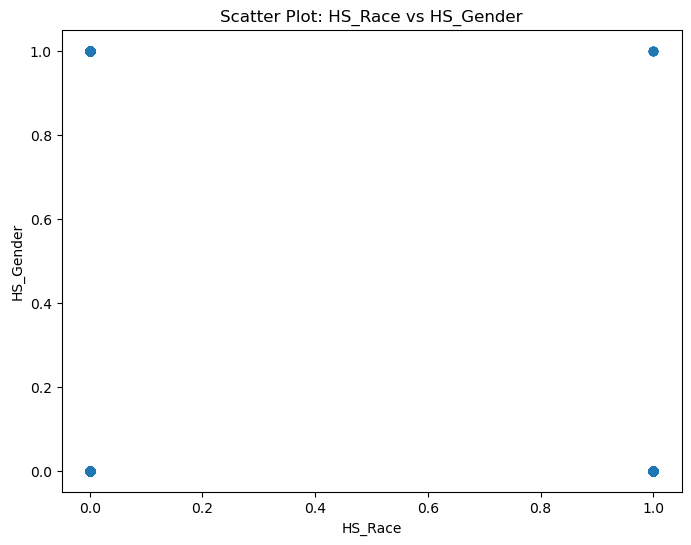

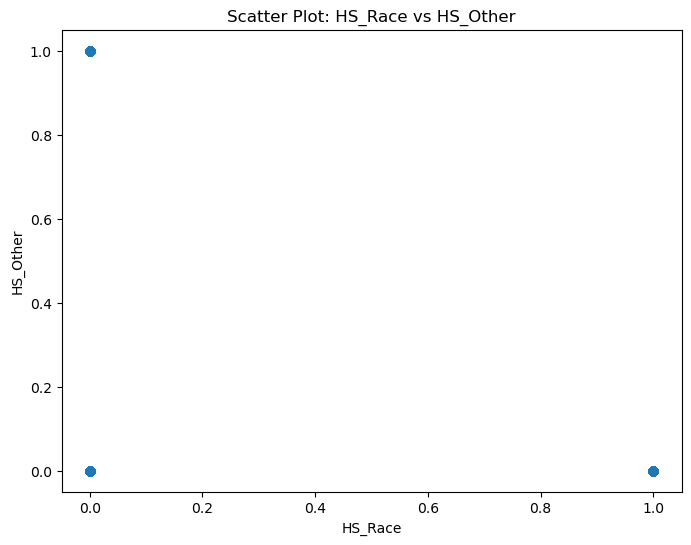

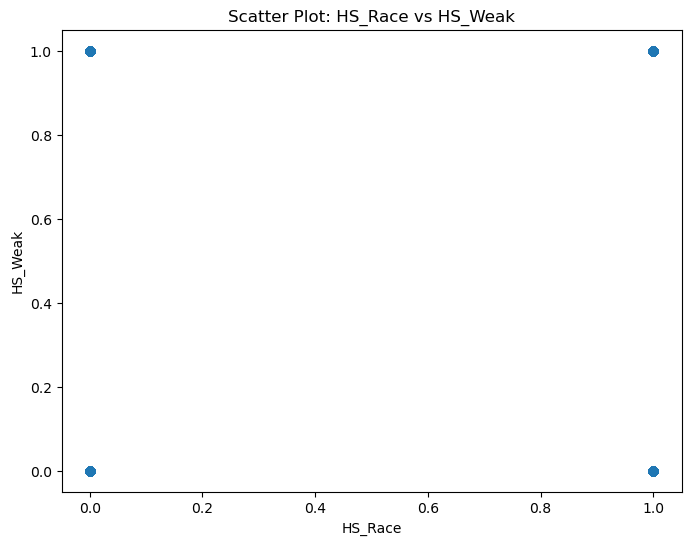

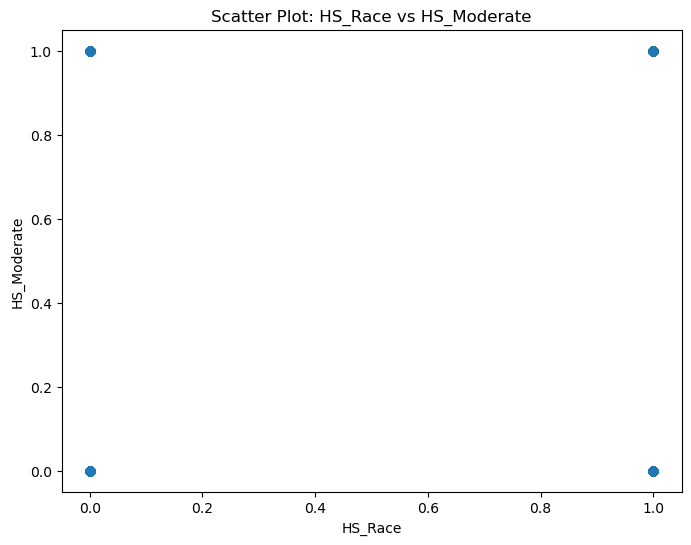

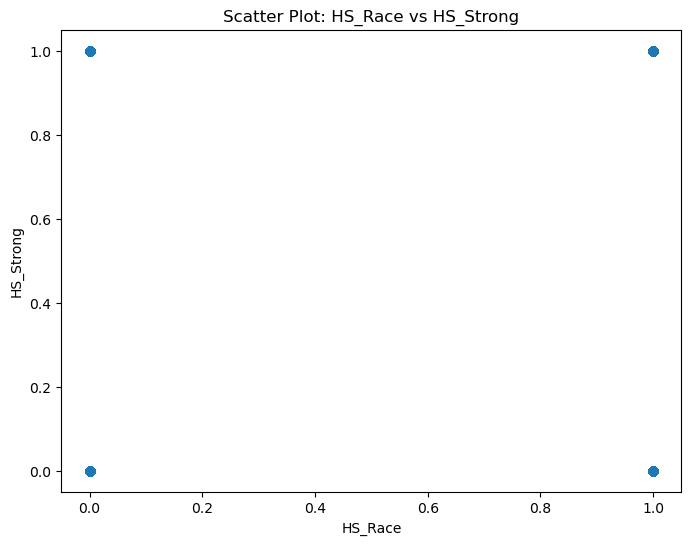

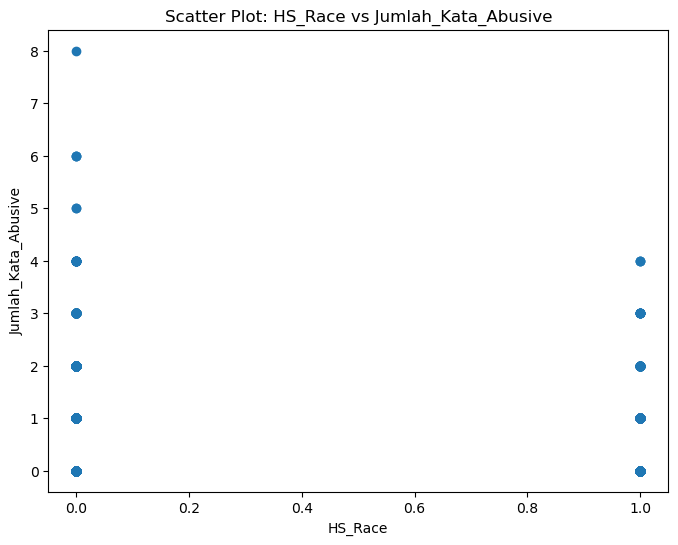

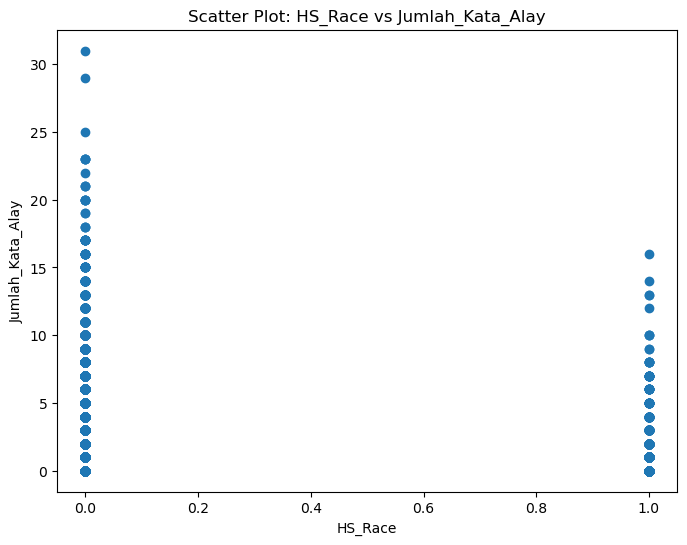

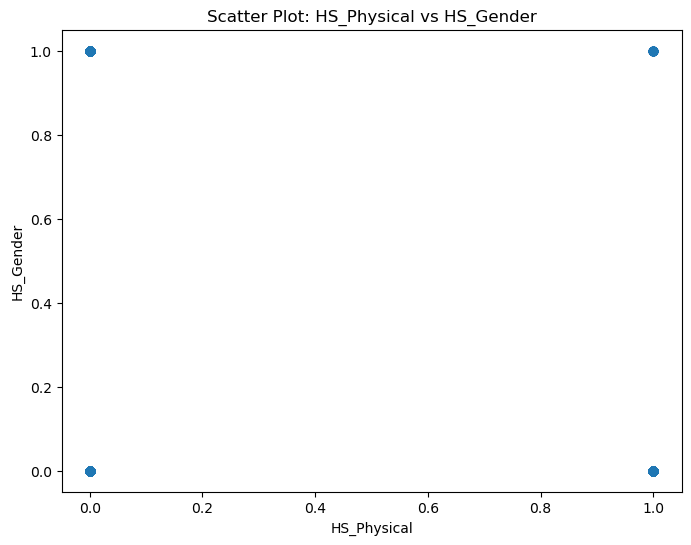

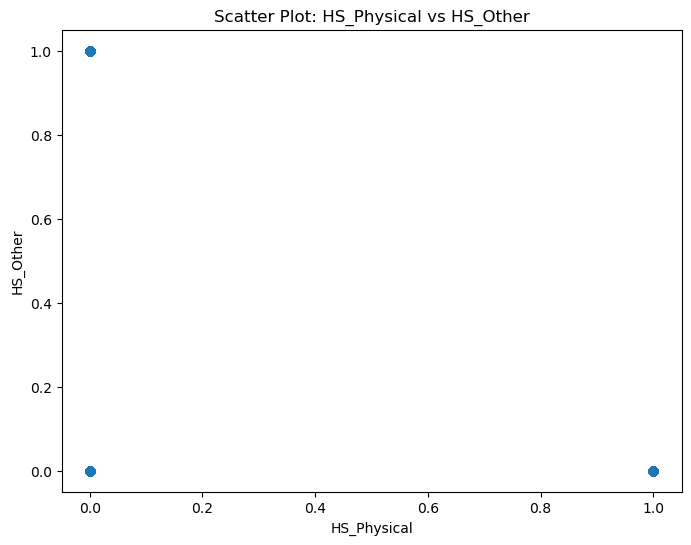

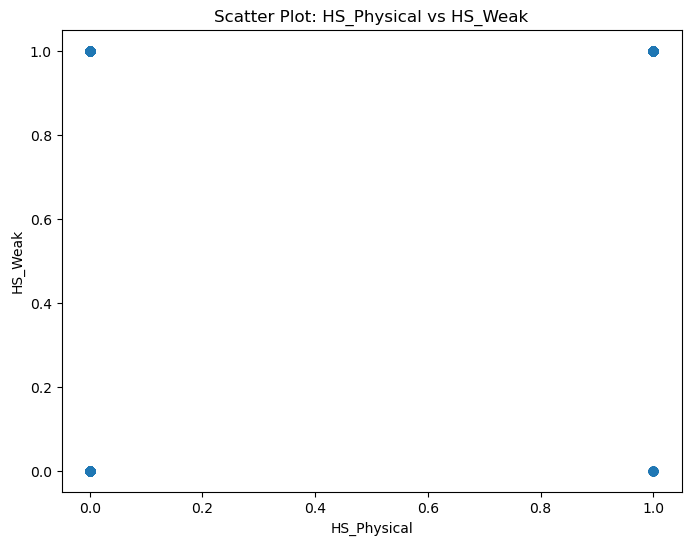

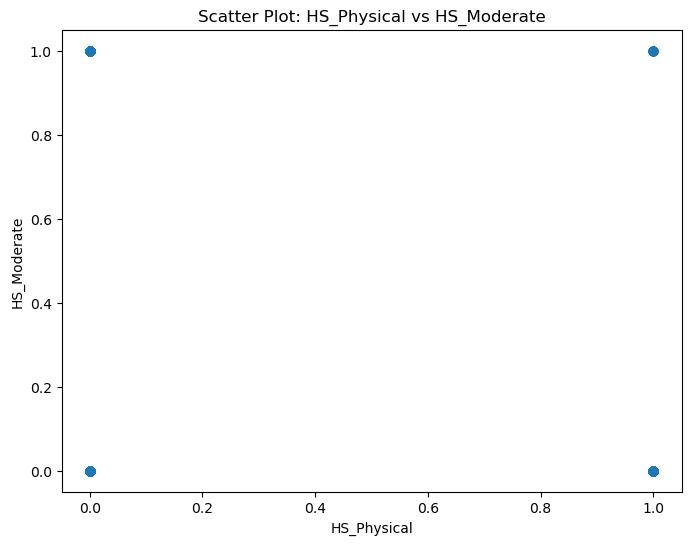

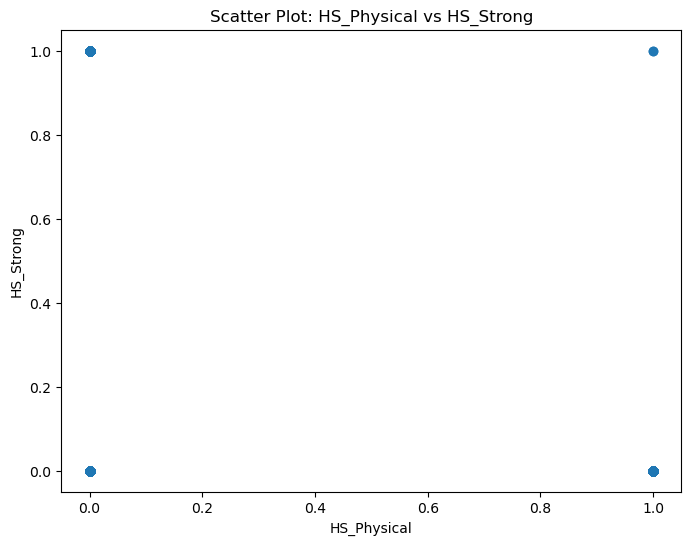

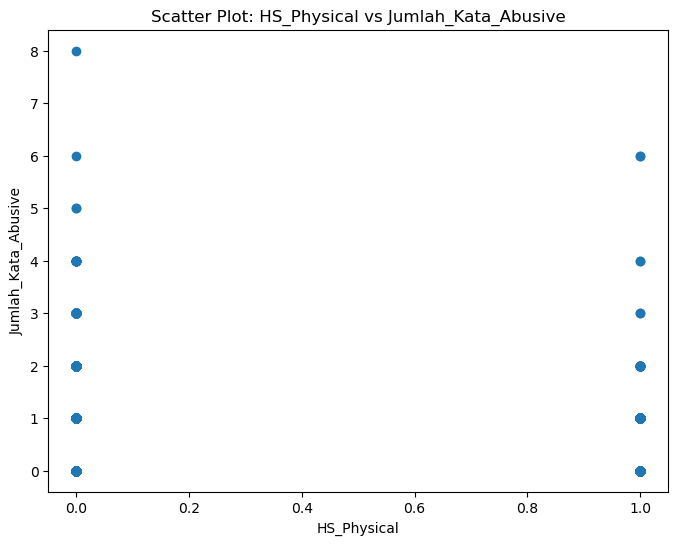

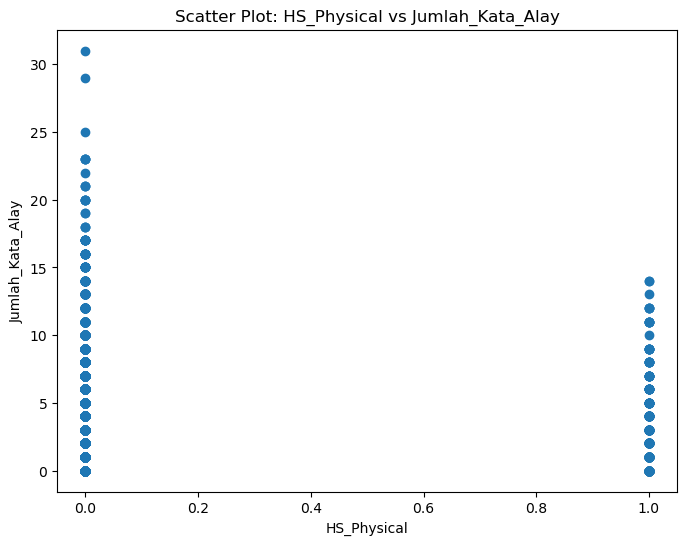

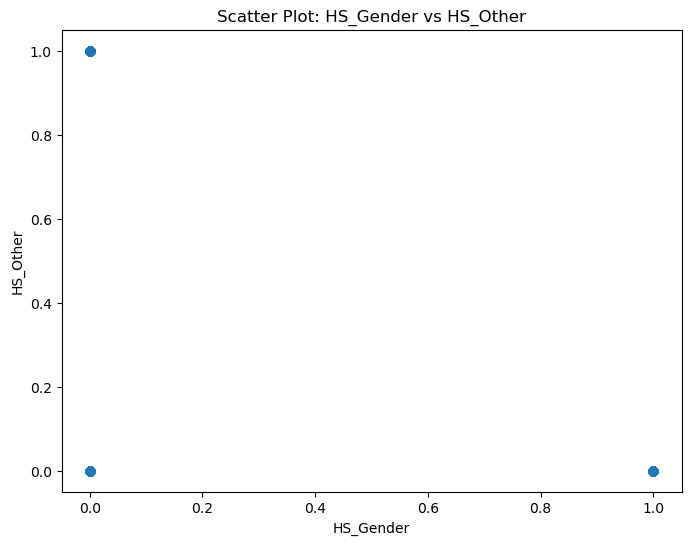

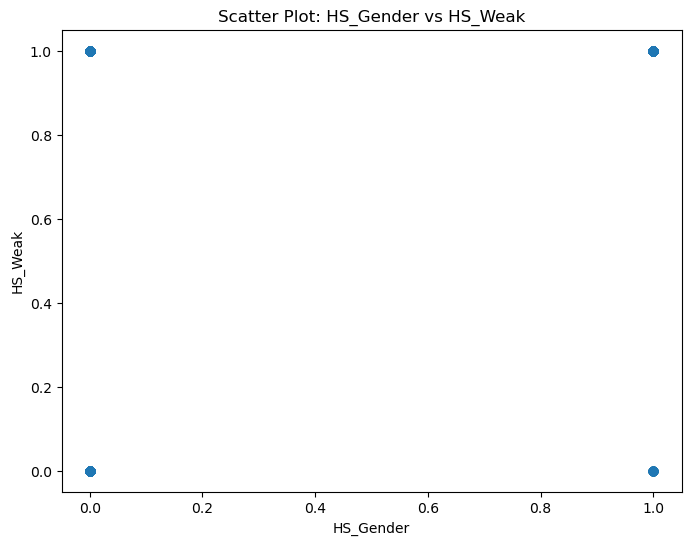

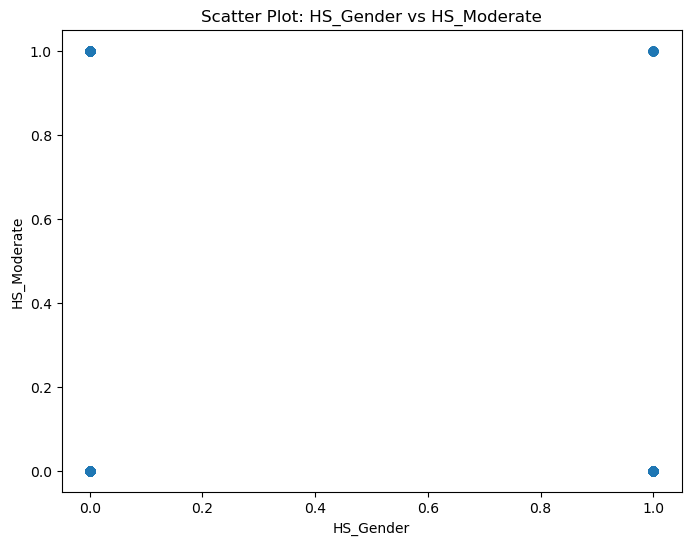

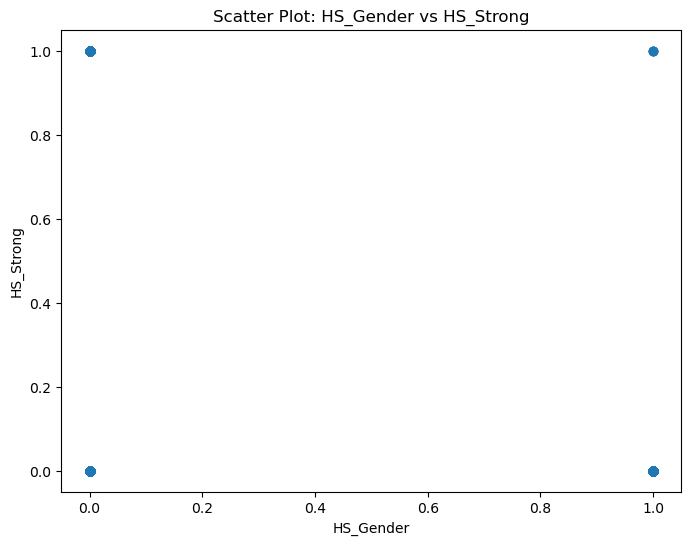

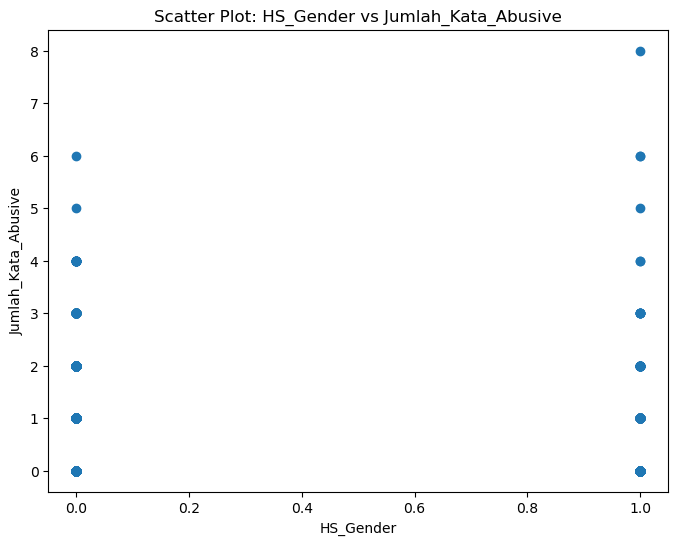

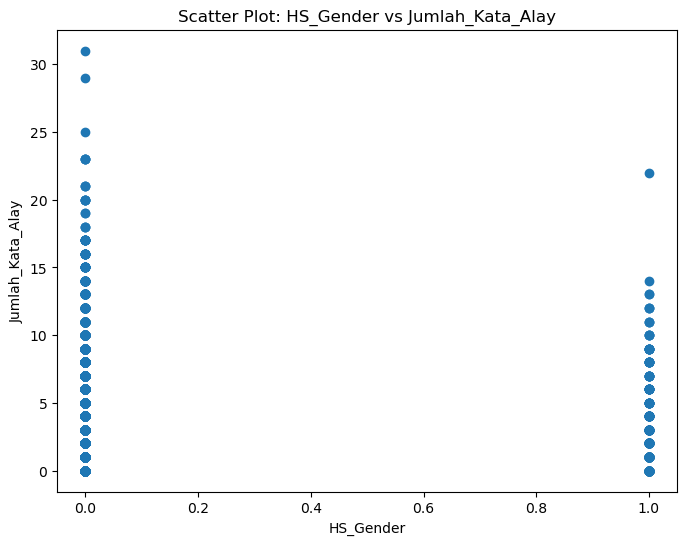

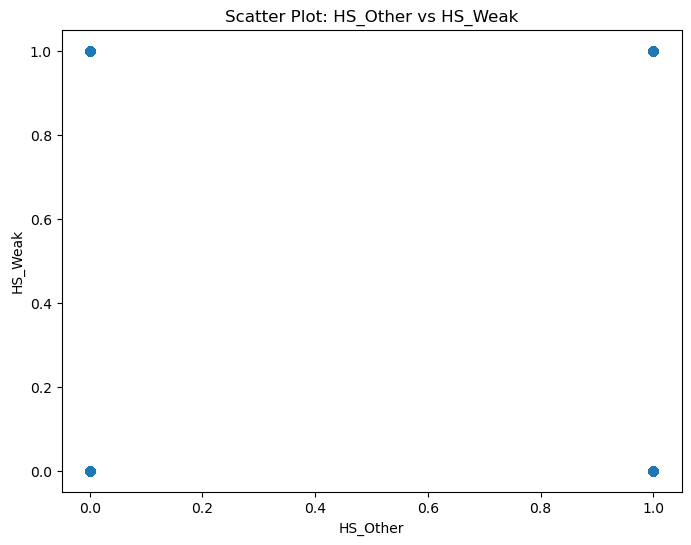

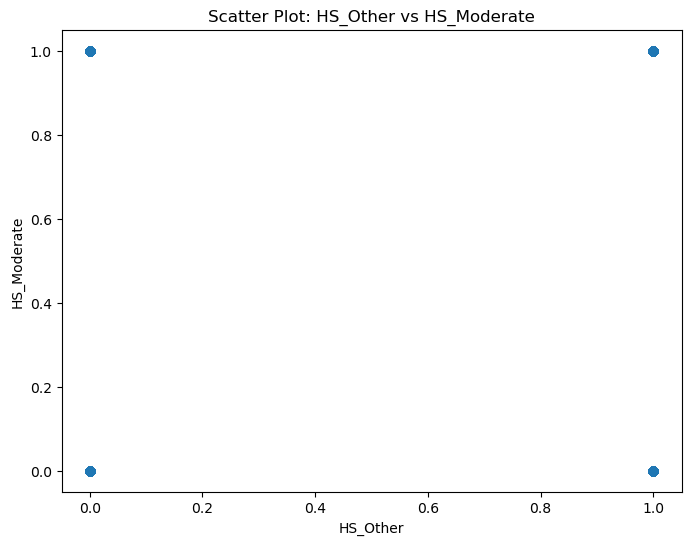

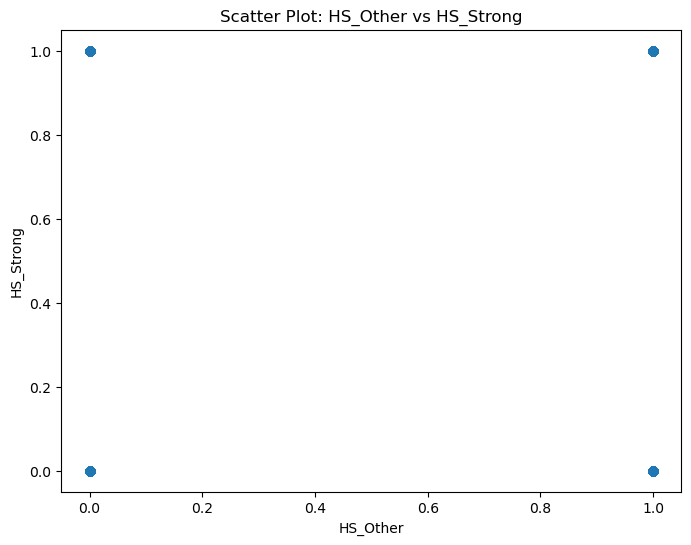

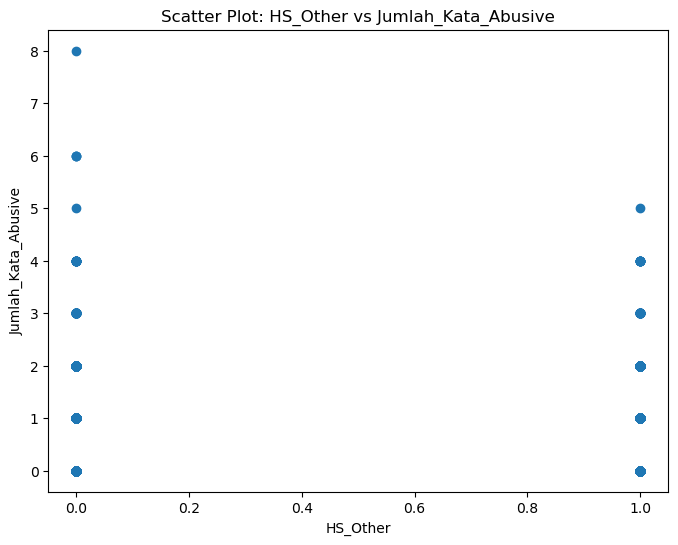

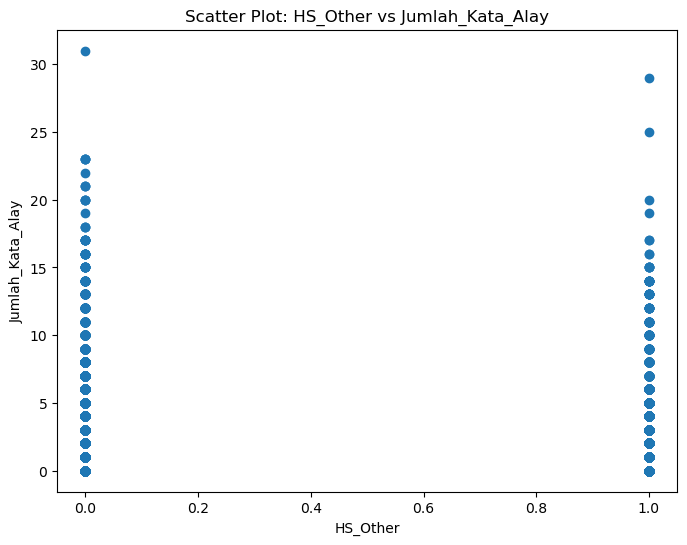

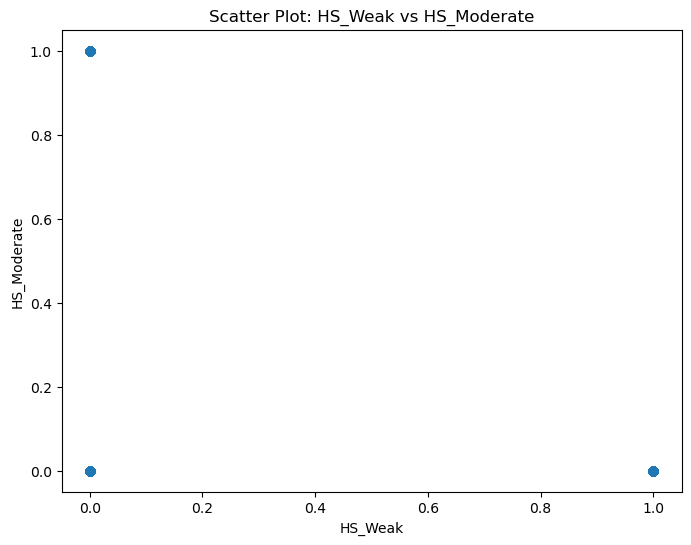

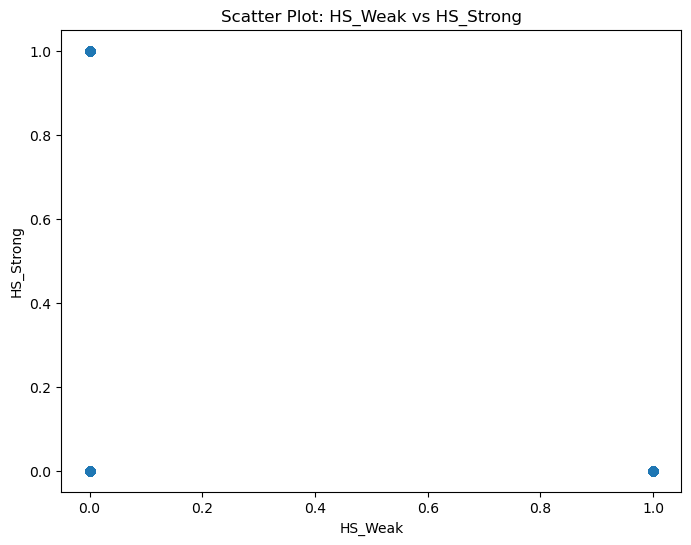

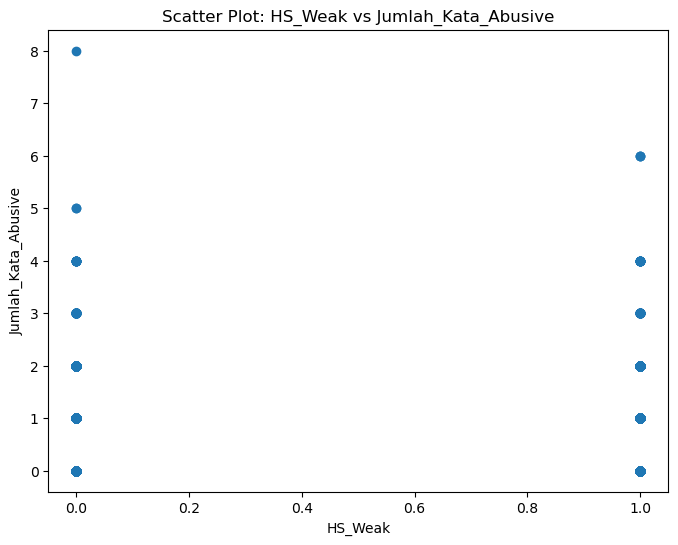

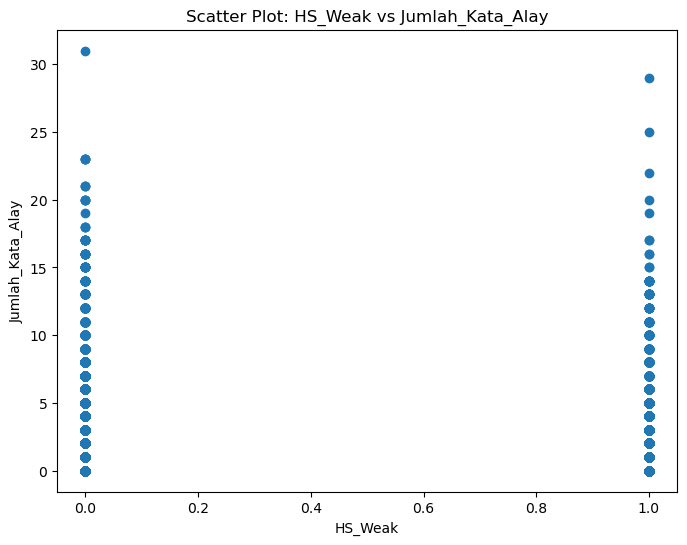

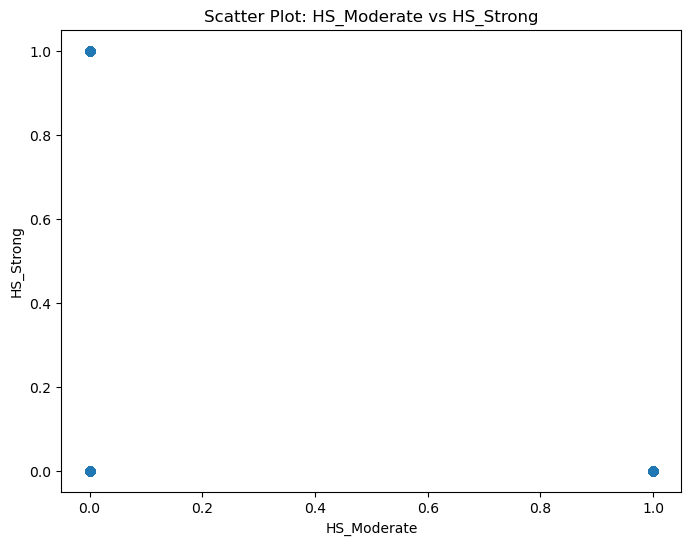

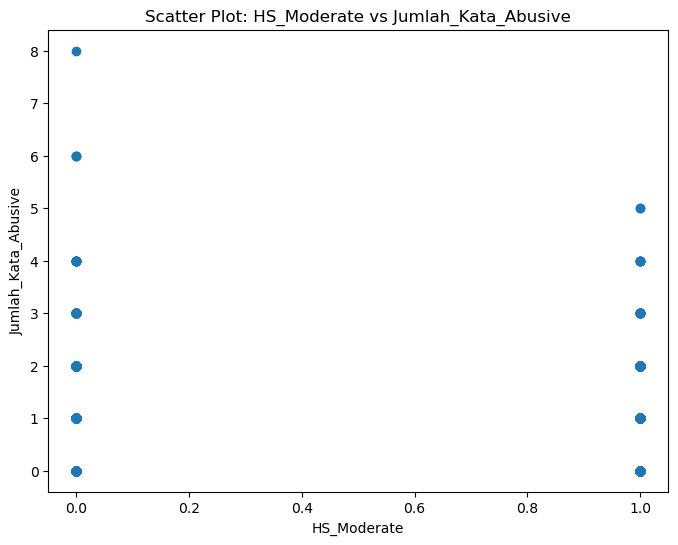

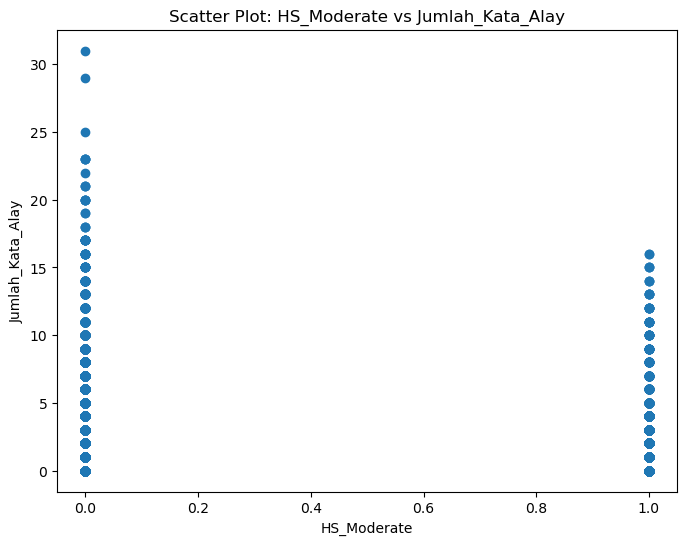

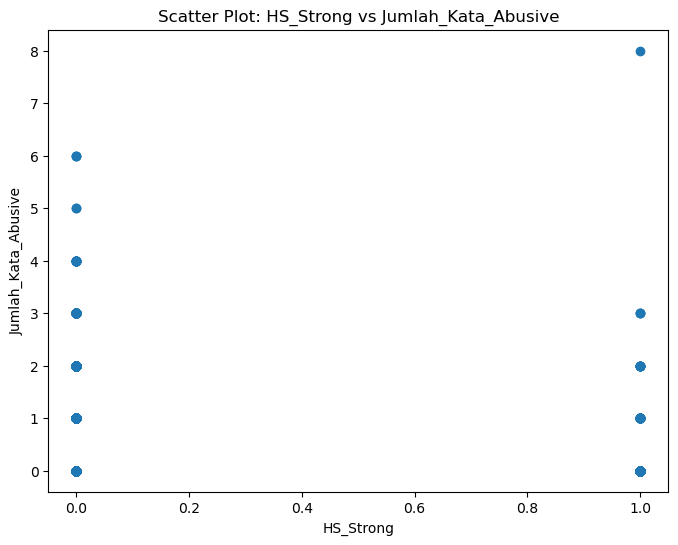

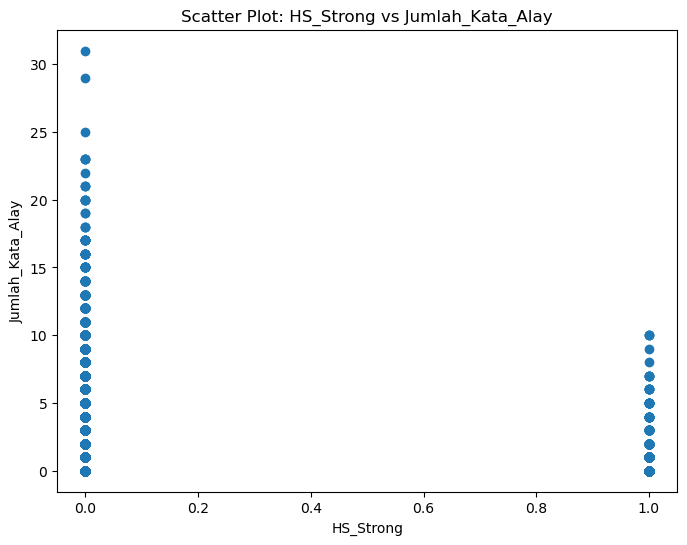

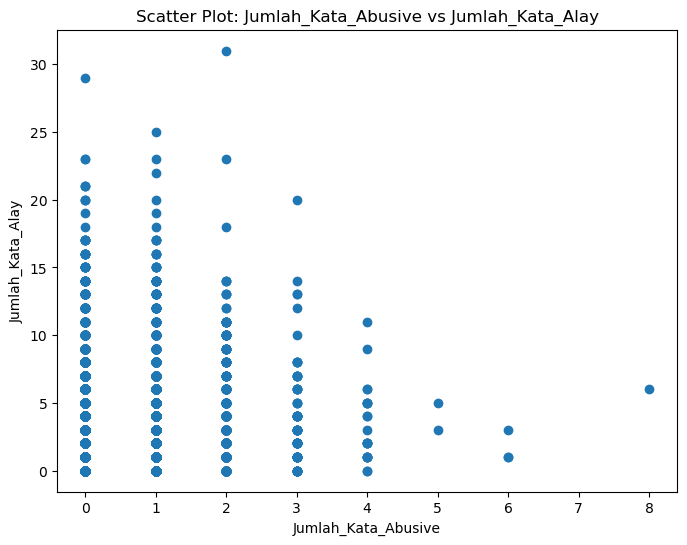

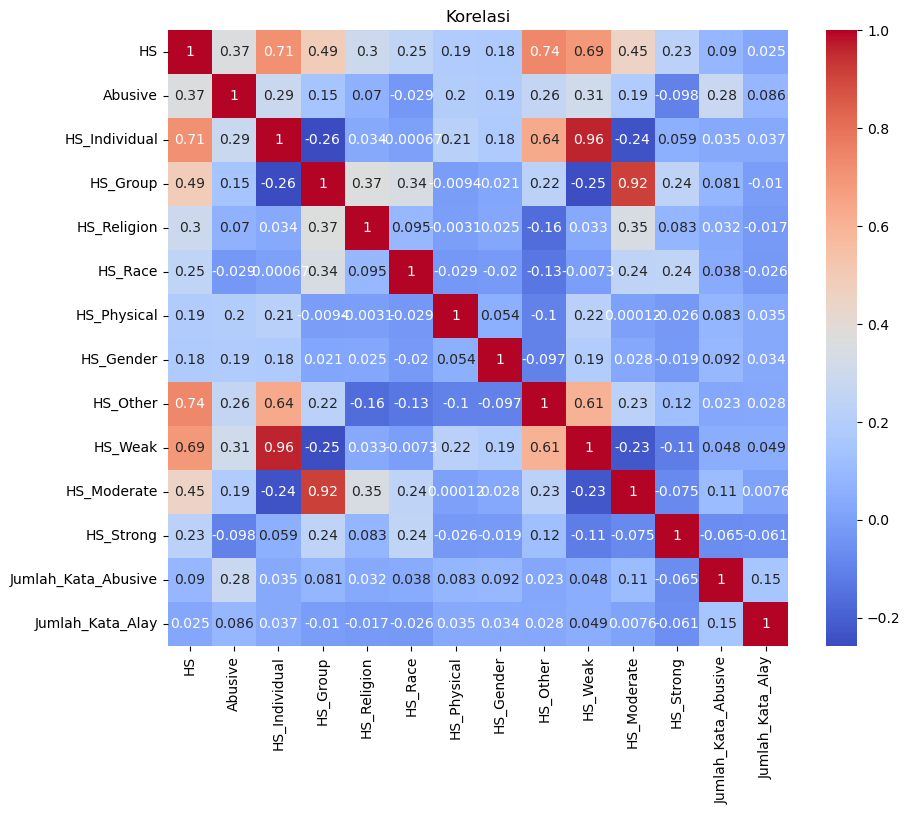

In [45]:
# Select the variables for the scatter plot
# Columns
columns = ['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong','Jumlah_Kata_Abusive','Jumlah_Kata_Alay']

# Correlation matrix
correlation_matrix = df_new[columns].corr()

# Scatter plot for each combination
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        x = df_new[columns[i]]
        y = df_new[columns[j]]
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y)
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.title(f'Scatter Plot: {columns[i]} vs {columns[j]}')
        plt.show()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi')
plt.show()